# World Health Statistics
### Merged according to category similarity

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import warnings
from itertools import product
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

In [2]:
# Define the directory path
directory = r"C:\Users\Ahmad1\Documents\GitHub\ie423-2024-termproject-the-a-team\DataSets\WorldHealth"

# Define the filenames for each group of CSV files
mortality_files = ["infantMortalityRate.csv", "under5MortalityRate.csv", "neonatalMortalityRate.csv", "mortalityRatePoisoning.csv", "crudeSuicideRates.csv", "30-70cancerChdEtc.csv"]
life_expectancy_files = ["lifeExpectancyAtBirth.csv",  "HALElifeExpectancyAtBirth.csv"]
region_files =["WHOregionLifeExpectancyAtBirth.csv", "HALeWHOregionLifeExpectancyAtBirth.csv","%HaleInLifeExpectancy.csv"]
health_services_files = ["basicDrinkingWaterServices.csv", "atLeastBasicSanitizationServices.csv", "safelySanitization.csv", "basicHandWashing.csv", "birthAttendedBySkilledPersonal.csv"]
disease_incidence_files = ["interventionAgianstNTDs.csv", "incedenceOfMalaria.csv", "incedenceOfTuberculosis.csv", "hepatitusBsurfaceAntigen.csv", "newHivInfections.csv"]
maternal_health_files = ["maternalMortalityRatio.csv"]

# Function to merge CSV files
def merge_csv_files(files):
    dfs = []
    for file in files:
        filepath = os.path.join(directory, file)
        if os.path.exists(filepath):
            df = pd.read_csv(filepath)
            dfs.append(df)
        else:
            print(f"File '{file}' not found.")
    if dfs:
        merged_df = pd.concat(dfs, ignore_index=True)
        return merged_df
    else:
        return None


# Merge mortality files
merged_mortality = merge_csv_files(mortality_files)

# Merge life expectancy files
merged_life_expectancy = merge_csv_files(life_expectancy_files)

# Merge region files
merged_region_expectancy = merge_csv_files(region_files)

# Merge health services files
merged_health_services = merge_csv_files(health_services_files)

# Merge disease incidence files
merged_disease_incidence = merge_csv_files(disease_incidence_files)

# Merge maternal health files
merged_maternal_health = merge_csv_files(maternal_health_files)


In [3]:
# List all CSV files in the directory
csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]

# Loop through each CSV file
for file in csv_files:
    # Construct the full path to the CSV file
    file_path = os.path.join(directory, file)
    
    # Load the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Display basic information about the DataFrame
    print(f"Information about {file}:")
    print(df.info())
    print("\nSummary statistics:")
    print(df.describe())
    print("\nSample data:")
    print(df.head())
    print("\n\n")


Information about %HaleInLifeExpectancy.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location                      72 non-null     object 
 1   Period                        72 non-null     int64  
 2   Indicator                     72 non-null     object 
 3   Dim1                          72 non-null     object 
 4   Hale Expectency               72 non-null     float64
 5   Life expectany                72 non-null     float64
 6   Unnamed: 6                    72 non-null     float64
 7   % OF HALE in life expectancy  72 non-null     int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 4.6+ KB
None

Summary statistics:
            Period  Hale Expectency  Life expectany  Unnamed: 6  \
count    72.000000        72.000000       72.000000   72.000000   
mean   2011.000000        61.403333      

### Merged Mortality

In [4]:
if merged_mortality is not None:
    print("Merged Mortality Data:")
    print(merged_mortality.head())

Merged Mortality Data:
      Location  Period                                          Indicator  \
0  Afghanistan    2019  Infant mortality rate (probability of dying be...   
1  Afghanistan    2019  Infant mortality rate (probability of dying be...   
2  Afghanistan    2019  Infant mortality rate (probability of dying be...   
3  Afghanistan    2018  Infant mortality rate (probability of dying be...   
4  Afghanistan    2018  Infant mortality rate (probability of dying be...   

         Dim1        First Tooltip  
0  Both sexes  46.51 [37.71-55.82]  
1        Male    49.8 [40.2-59.95]  
2      Female  43.05 [34.82-51.96]  
3  Both sexes  48.04 [39.94-56.32]  
4        Male   51.35 [42.56-60.4]  


In [5]:
# Check for missing values in the merged_life_expectancy DataFrame
missing_values_mortality = merged_mortality.isnull()

# Print the DataFrame with missing value indicators
print(missing_values_mortality)


       Location  Period  Indicator   Dim1  First Tooltip
0         False   False      False  False          False
1         False   False      False  False          False
2         False   False      False  False          False
3         False   False      False  False          False
4         False   False      False  False          False
...         ...     ...        ...    ...            ...
77363     False   False      False  False          False
77364     False   False      False  False          False
77365     False   False      False  False          False
77366     False   False      False  False          False
77367     False   False      False  False          False

[77368 rows x 5 columns]


#### Check for Duplicates and Outliers

In [6]:
duplicate_rows = merged_mortality[merged_mortality.duplicated()]

# Display duplicate rows (if any)
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

No duplicate rows found.


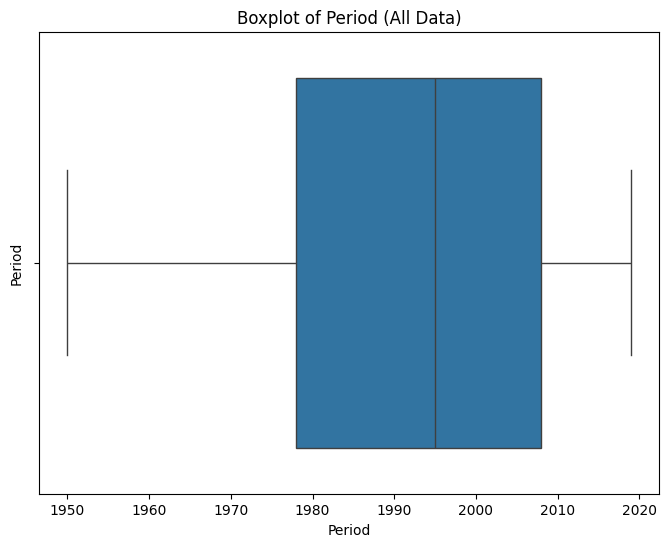

In [7]:
# Step 1: Create a boxplot for the 'Period' column including all data
plt.figure(figsize=(8, 6))
sns.boxplot(data=merged_mortality['Period'], orient='h')
plt.title('Boxplot of Period (All Data)')
plt.ylabel('Period')
plt.show()

In [8]:
# Step 2: Check for duplicate rows and create a boxplot with filtered data excluding duplicates
duplicates = merged_mortality[merged_mortality.duplicated()]
if not duplicates.empty:
    print("Duplicates:")
    print(duplicates)
    filtered_data = merged_mortality.drop_duplicates()
    sns.boxplot(data=filtered_data['Period'], orient ='h')
    plt.title('Boxplot of Period (Excluding Duplicates)')
    plt.ylabel('Period')
    plt.show()
else:
    print("No duplicate rows found.")


No duplicate rows found.


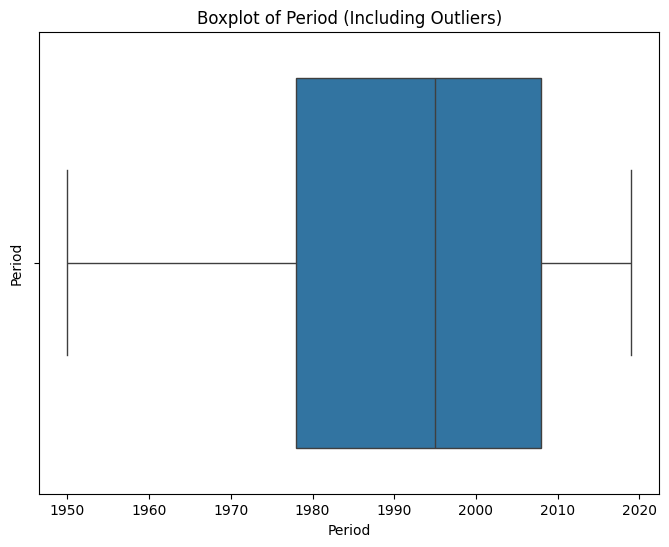

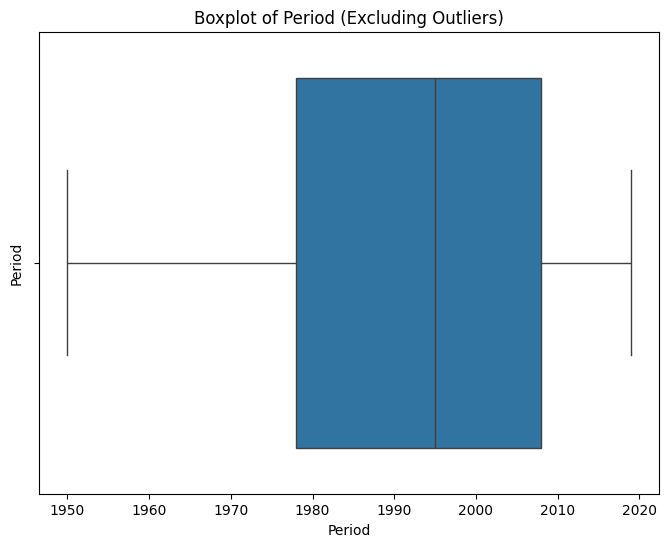

In [9]:
# Step 3: Identify outliers in the 'Period' column
def detect_outliers_iqr(data, threshold=1.5):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (threshold * iqr)
    upper_bound = q3 + (threshold * iqr)
    outliers_indices = data[(data < lower_bound) | (data > upper_bound)].index
    return outliers_indices

outliers_indices = detect_outliers_iqr(merged_mortality['Period'])
# Step 4: Create a boxplot for the 'Period' column including outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=merged_mortality['Period'], orient='h')
plt.title('Boxplot of Period (Including Outliers)')
plt.ylabel('Period')
plt.show()

# Step 5: Create a boxplot for the 'Period' column excluding outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=merged_mortality['Period'].drop(outliers_indices), orient='h')
plt.title('Boxplot of Period (Excluding Outliers)')
plt.ylabel('Period')
plt.show()

#### Check Unique Values

In [10]:
unique_counts = merged_mortality.nunique()
print(unique_counts)

Location           200
Period              70
Indicator            6
Dim1                 3
First Tooltip    69311
dtype: int64


In [11]:
merged_mortality.describe()

,Period
count,77368.000000
mean,1991.856969
std,18.531457
min,1950.000000
25%,1978.000000
50%,1995.000000
75%,2008.000000
max,2019.000000


In [12]:
print(merged_mortality.dtypes)

Location         object
Period            int64
Indicator        object
Dim1             object
First Tooltip    object
dtype: object


##### location, indicator, dim1, first tooltip are all categorical variables

In [13]:
merged_mortality.head()

,Location,Period,Indicator,Dim1,First Tooltip
0,Afghanistan,2019,Infant mortality rate (probability of dying be...,Both sexes,46.51 [37.71-55.82]
1,Afghanistan,2019,Infant mortality rate (probability of dying be...,Male,49.8 [40.2-59.95]
2,Afghanistan,2019,Infant mortality rate (probability of dying be...,Female,43.05 [34.82-51.96]
3,Afghanistan,2018,Infant mortality rate (probability of dying be...,Both sexes,48.04 [39.94-56.32]
4,Afghanistan,2018,Infant mortality rate (probability of dying be...,Male,51.35 [42.56-60.4]


In [14]:
# Remove brackets and values inside them, ranges are unnecessary 
merged_mortality['First Tooltip'] = merged_mortality['First Tooltip'].str.extract(r'(\d+\.\d+)', expand=False)

# Convert 'First Tooltip' to float
merged_mortality['First Tooltip'] = merged_mortality['First Tooltip'].astype(float)

# Print the cleaned DataFrame
merged_mortality.head()

,Location,Period,Indicator,Dim1,First Tooltip
0,Afghanistan,2019,Infant mortality rate (probability of dying be...,Both sexes,46.51
1,Afghanistan,2019,Infant mortality rate (probability of dying be...,Male,49.80
2,Afghanistan,2019,Infant mortality rate (probability of dying be...,Female,43.05
3,Afghanistan,2018,Infant mortality rate (probability of dying be...,Both sexes,48.04
4,Afghanistan,2018,Infant mortality rate (probability of dying be...,Male,51.35


In [15]:
#Dim1 is irrelevant to our analysis so we will drop it 

# Print the columns in your DataFrame
print(merged_mortality.columns)

# Check if 'Dim1' exists in the columns
if 'Dim1' in merged_mortality.columns:
    # Drop the 'Dim1' column
    merged_mortality.drop(columns=['Dim1'], inplace=True)
else:
    print("'Dim1' column not found in DataFrame.")

# Print the updated DataFrame
merged_mortality.head()


Index(['Location', 'Period', 'Indicator', 'Dim1', 'First Tooltip'], dtype='object')


,Location,Period,Indicator,First Tooltip
0,Afghanistan,2019,Infant mortality rate (probability of dying be...,46.51
1,Afghanistan,2019,Infant mortality rate (probability of dying be...,49.80
2,Afghanistan,2019,Infant mortality rate (probability of dying be...,43.05
3,Afghanistan,2018,Infant mortality rate (probability of dying be...,48.04
4,Afghanistan,2018,Infant mortality rate (probability of dying be...,51.35


### Merged Life Expectency


In [16]:
if merged_life_expectancy is not None:
    print("Merged Life Expectancy Data:")
    print(merged_life_expectancy.head())

Merged Life Expectancy Data:
      Location  Period                         Indicator        Dim1  \
0  Afghanistan    2019  Life expectancy at birth (years)  Both sexes   
1  Afghanistan    2019  Life expectancy at birth (years)        Male   
2  Afghanistan    2019  Life expectancy at birth (years)      Female   
3  Afghanistan    2015  Life expectancy at birth (years)  Both sexes   
4  Afghanistan    2015  Life expectancy at birth (years)        Male   

   First Tooltip  
0          63.21  
1          63.29  
2          63.16  
3          61.65  
4          61.04  


In [17]:
merged_life_expectancy.tail()

,Location,Period,Indicator,Dim1,First Tooltip
4388,Zimbabwe,2010,Healthy life expectancy (HALE) at birth (years),Male,44.25
4389,Zimbabwe,2010,Healthy life expectancy (HALE) at birth (years),Female,46.12
4390,Zimbabwe,2000,Healthy life expectancy (HALE) at birth (years),Both sexes,41.03
4391,Zimbabwe,2000,Healthy life expectancy (HALE) at birth (years),Male,40.39
4392,Zimbabwe,2000,Healthy life expectancy (HALE) at birth (years),Female,41.77


In [18]:
# Check for missing values in the merged_life_expectancy DataFrame
missing_values_life_expectancy = merged_life_expectancy.isnull()

# Print the DataFrame with missing value indicators
print(missing_values_life_expectancy)


      Location  Period  Indicator   Dim1  First Tooltip
0        False   False      False  False          False
1        False   False      False  False          False
2        False   False      False  False          False
3        False   False      False  False          False
4        False   False      False  False          False
...        ...     ...        ...    ...            ...
4388     False   False      False  False          False
4389     False   False      False  False          False
4390     False   False      False  False          False
4391     False   False      False  False          False
4392     False   False      False  False          False

[4393 rows x 5 columns]


In [19]:
# true values = null 
#since they are important to our analysis will use imputation 
#to decide on whether to use mean,mode, median
merged_life_expectancy.describe()

,Period,First Tooltip
count,4393.000000,4393.000000
mean,2010.979285,65.811598
std,7.237751,9.427245
min,1920.000000,25.370000
25%,2000.000000,60.070000
50%,2010.000000,66.280000
75%,2015.000000,72.200000
max,2019.000000,86.940000


In [20]:
print(merged_life_expectancy.dtypes)
#Mean: Use the mean when the data is normally distributed and does not have outliers.
#Median: Use the median when the data has outliers or is not normally distributed.
#Mode: Use the mode for categorical or discrete data, although in your case, you're dealing with continuous variables.

Location          object
Period             int64
Indicator         object
Dim1              object
First Tooltip    float64
dtype: object


In [21]:
#location, indicator, dim1 are categorical variables


In [22]:
merged_life_expectancy.head()

,Location,Period,Indicator,Dim1,First Tooltip
0,Afghanistan,2019,Life expectancy at birth (years),Both sexes,63.21
1,Afghanistan,2019,Life expectancy at birth (years),Male,63.29
2,Afghanistan,2019,Life expectancy at birth (years),Female,63.16
3,Afghanistan,2015,Life expectancy at birth (years),Both sexes,61.65
4,Afghanistan,2015,Life expectancy at birth (years),Male,61.04


In [23]:
#Dim1 is irrelevant to our analysis so we will drop it 

# Print the columns in your DataFrame
print(merged_life_expectancy.columns)

# Check if 'Dim1' exists in the columns
if 'Dim1' in merged_life_expectancy.columns:
    # Drop the 'Dim1' column
    merged_life_expectancy.drop(columns=['Dim1'], inplace=True)
else:
    print("'Dim1' column not found in DataFrame.")

# Print the updated DataFrame
merged_life_expectancy.head()

Index(['Location', 'Period', 'Indicator', 'Dim1', 'First Tooltip'], dtype='object')


,Location,Period,Indicator,First Tooltip
0,Afghanistan,2019,Life expectancy at birth (years),63.21
1,Afghanistan,2019,Life expectancy at birth (years),63.29
2,Afghanistan,2019,Life expectancy at birth (years),63.16
3,Afghanistan,2015,Life expectancy at birth (years),61.65
4,Afghanistan,2015,Life expectancy at birth (years),61.04


#### Checking for Duplicate Rows

In [24]:
duplicate_rows = merged_life_expectancy[merged_life_expectancy.duplicated()]

# Display duplicate rows (if any)
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

Duplicate Rows:
      Location  Period                                        Indicator  \
3261    Kuwait    2010  Healthy life expectancy (HALE) at birth (years)   
3651      Oman    2019  Healthy life expectancy (HALE) at birth (years)   
3665  Pakistan    2015  Healthy life expectancy (HALE) at birth (years)   

      First Tooltip  
3261          69.21  
3651          64.51  
3665          55.78  


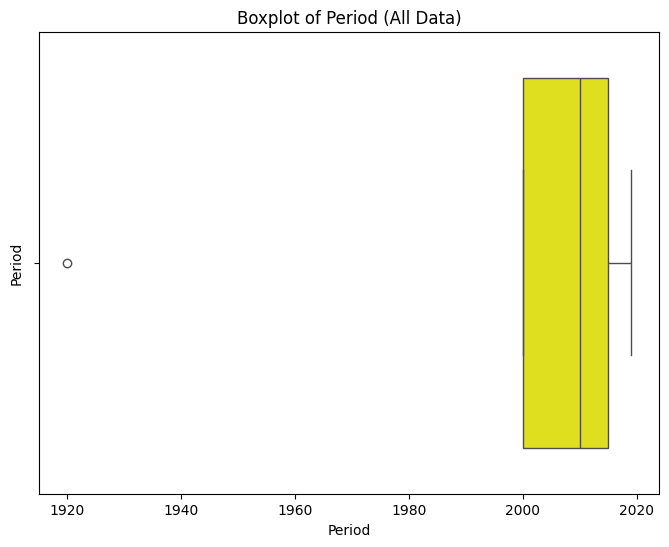

In [25]:
# Step 1: Create a boxplot for the 'Period' column including all data
plt.figure(figsize=(8, 6))
sns.boxplot(data=merged_life_expectancy['Period'], orient='h', color='yellow')
plt.title('Boxplot of Period (All Data)')
plt.ylabel('Period')
plt.show()

Duplicates:
      Location  Period                                        Indicator  \
3261    Kuwait    2010  Healthy life expectancy (HALE) at birth (years)   
3651      Oman    2019  Healthy life expectancy (HALE) at birth (years)   
3665  Pakistan    2015  Healthy life expectancy (HALE) at birth (years)   

      First Tooltip  
3261          69.21  
3651          64.51  
3665          55.78  


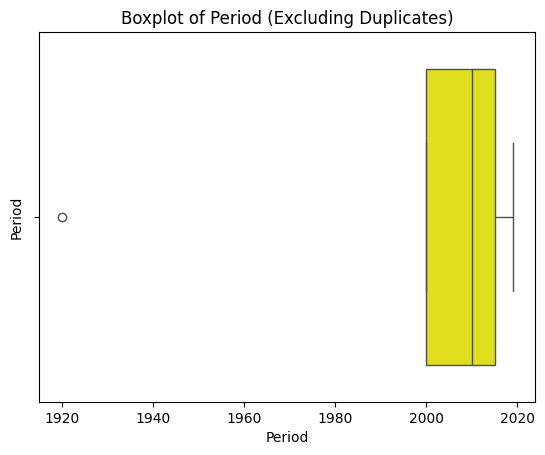

In [26]:

# Step 2: Check for duplicate rows and create a boxplot with filtered data excluding duplicates
duplicates = merged_life_expectancy[merged_life_expectancy.duplicated()]
if not duplicates.empty:
    print("Duplicates:")
    print(duplicates)
    filtered_data = merged_life_expectancy.drop_duplicates()
    sns.boxplot(data=filtered_data['Period'],color='yellow', orient='h')
    plt.title('Boxplot of Period (Excluding Duplicates)')
    plt.ylabel('Period')
    plt.show()
else:
    print("No duplicate rows found.")


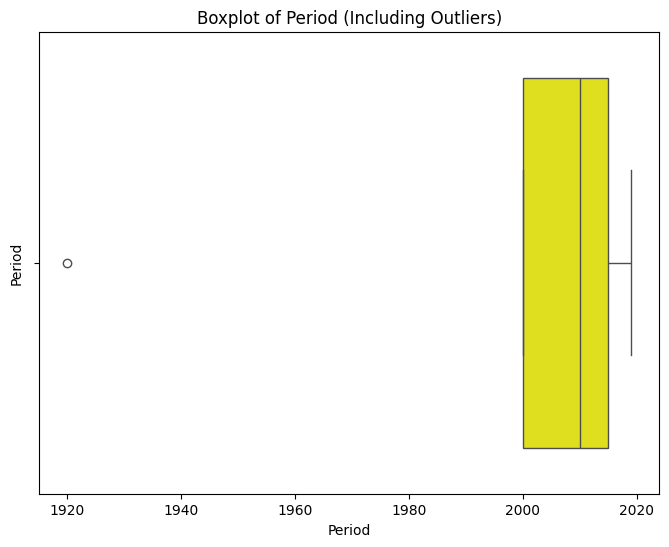

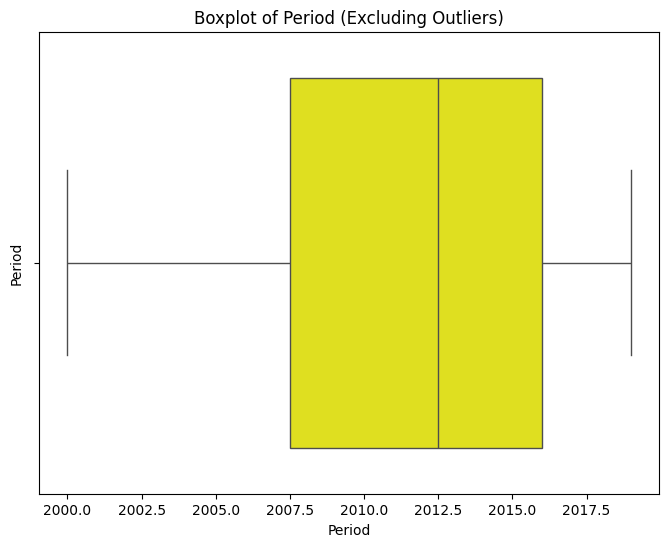

In [27]:
# Step 3: Identify outliers in the 'Period' column
def detect_outliers_iqr(data, threshold=1.5):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (threshold * iqr)
    upper_bound = q3 + (threshold * iqr)
    outliers_indices = data[(data < lower_bound) | (data > upper_bound)].index
    return outliers_indices

outliers_indices = detect_outliers_iqr(merged_life_expectancy['Period'])
# Step 4: Create a boxplot for the 'Period' column including outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=merged_life_expectancy['Period'], color='yellow', orient='h')
plt.title('Boxplot of Period (Including Outliers)')
plt.ylabel('Period')
plt.show()

# Step 5: Create a boxplot for the 'Period' column excluding outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=merged_life_expectancy['Period'].drop(outliers_indices), color='yellow', orient='h')
plt.title('Boxplot of Period (Excluding Outliers)')
plt.ylabel('Period')
plt.show()

### Region Expectancy

In [28]:
if merged_region_expectancy is not None:
    print("Merged Region Expectancy Data:")
    print(merged_region_expectancy.head())

Merged Region Expectancy Data:
  Location  Period                         Indicator        Dim1  \
0   Africa    2019  Life expectancy at birth (years)  Both sexes   
1   Africa    2019  Life expectancy at birth (years)        Male   
2   Africa    2019  Life expectancy at birth (years)      Female   
3   Africa    2015  Life expectancy at birth (years)  Both sexes   
4   Africa    2015  Life expectancy at birth (years)        Male   

   First Tooltip  Hale Expectency  Life expectany  Unnamed: 6  \
0          64.49              NaN             NaN         NaN   
1          62.37              NaN             NaN         NaN   
2          66.65              NaN             NaN         NaN   
3          62.56              NaN             NaN         NaN   
4          60.47              NaN             NaN         NaN   

   % OF HALE in life expectancy  
0                           NaN  
1                           NaN  
2                           NaN  
3                           NaN  

In [29]:
print(merged_region_expectancy.dtypes)

Location                         object
Period                            int64
Indicator                        object
Dim1                             object
First Tooltip                   float64
Hale Expectency                 float64
Life expectany                  float64
Unnamed: 6                      float64
% OF HALE in life expectancy    float64
dtype: object


In [30]:
merged_region_expectancy.head()

,Location,Period,Indicator,Dim1,First Tooltip,Hale Expectency,Life expectany,Unnamed: 6,% OF HALE in life expectancy
0,Africa,2019,Life expectancy at birth (years),Both sexes,64.49,NaN,NaN,NaN,NaN
1,Africa,2019,Life expectancy at birth (years),Male,62.37,NaN,NaN,NaN,NaN
2,Africa,2019,Life expectancy at birth (years),Female,66.65,NaN,NaN,NaN,NaN
3,Africa,2015,Life expectancy at birth (years),Both sexes,62.56,NaN,NaN,NaN,NaN
4,Africa,2015,Life expectancy at birth (years),Male,60.47,NaN,NaN,NaN,NaN


In [31]:
# Check the columns before dropping
print("Columns before dropping:")
print(merged_region_expectancy.columns)

# Drop the 'Unnamed: 6' and dim1  column
merged_region_expectancy.drop(columns=['Unnamed: 6', 'Dim1'], inplace=True)

 #Check the columns after dropping
print("\nColumns after dropping :")
print(merged_region_expectancy.columns)

Columns before dropping:
Index(['Location', 'Period', 'Indicator', 'Dim1', 'First Tooltip',
       'Hale Expectency', 'Life expectany', 'Unnamed: 6',
       '% OF HALE in life expectancy'],
      dtype='object')

Columns after dropping :
Index(['Location', 'Period', 'Indicator', 'First Tooltip', 'Hale Expectency',
       'Life expectany', '% OF HALE in life expectancy'],
      dtype='object')


In [32]:
print(merged_region_expectancy.head)

<bound method NDFrame.head of             Location  Period                                        Indicator  \
0             Africa    2019                 Life expectancy at birth (years)   
1             Africa    2019                 Life expectancy at birth (years)   
2             Africa    2019                 Life expectancy at birth (years)   
3             Africa    2015                 Life expectancy at birth (years)   
4             Africa    2015                 Life expectancy at birth (years)   
..               ...     ...                                              ...   
211  Western Pacific    2010  Healthy life expectancy (HALE) at birth (years)   
212  Western Pacific    2010  Healthy life expectancy (HALE) at birth (years)   
213  Western Pacific    2000  Healthy life expectancy (HALE) at birth (years)   
214  Western Pacific    2000  Healthy life expectancy (HALE) at birth (years)   
215  Western Pacific    2000  Healthy life expectancy (HALE) at birth (years)  

In [33]:
print(merged_region_expectancy.dtypes)

Location                         object
Period                            int64
Indicator                        object
First Tooltip                   float64
Hale Expectency                 float64
Life expectany                  float64
% OF HALE in life expectancy    float64
dtype: object


In [34]:
merged_region_expectancy.describe()

,Period,First Tooltip,Hale Expectency,Life expectany,% OF HALE in life expectancy
count,216.000000,72.000000,144.000000,144.000000,144.000000
mean,2011.000000,70.556806,61.403333,70.556806,87.013889
std,7.122842,6.880156,5.961208,6.856057,1.404220
min,2000.000000,51.060000,45.030000,51.060000,85.000000
25%,2007.500000,66.585000,57.870000,66.585000,86.000000
50%,2012.500000,71.375000,61.665000,71.375000,87.000000
75%,2016.000000,75.525000,66.360000,75.525000,88.000000
max,2019.000000,81.290000,70.240000,81.290000,90.000000


In [35]:
# Calculate the medians
median_tooltip = 71.375
median_hale = 61.665
median_life = 71.375
median_hale_pct = 87.0

# Fill missing values with medians
merged_region_expectancy['First Tooltip'].fillna(median_tooltip, inplace=True)
merged_region_expectancy['Hale Expectency'].fillna(median_hale, inplace=True)
merged_region_expectancy['Life expectany'].fillna(median_life, inplace=True)
merged_region_expectancy['% OF HALE in life expectancy'].fillna(median_hale_pct, inplace=True)

# Verify that missing values are filled
print(merged_region_expectancy.isnull().sum())


Location                        0
Period                          0
Indicator                       0
First Tooltip                   0
Hale Expectency                 0
Life expectany                  0
% OF HALE in life expectancy    0
dtype: int64


C:\Users\Ahmad1\AppData\Local\Temp\ipykernel_59168\2018587319.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_region_expectancy['First Tooltip'].fillna(median_tooltip, inplace=True)
C:\Users\Ahmad1\AppData\Local\Temp\ipykernel_59168\2018587319.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [36]:
merged_region_expectancy.head()

,Location,Period,Indicator,First Tooltip,Hale Expectency,Life expectany,% OF HALE in life expectancy
0,Africa,2019,Life expectancy at birth (years),64.49,61.665,71.375,87.0
1,Africa,2019,Life expectancy at birth (years),62.37,61.665,71.375,87.0
2,Africa,2019,Life expectancy at birth (years),66.65,61.665,71.375,87.0
3,Africa,2015,Life expectancy at birth (years),62.56,61.665,71.375,87.0
4,Africa,2015,Life expectancy at birth (years),60.47,61.665,71.375,87.0


#### Check for Duplicate Rows

In [37]:
duplicate_rows = merged_region_expectancy[merged_region_expectancy.duplicated()]

# Display duplicate rows (if any)
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

Duplicate Rows:
            Location  Period                                        Indicator  \
144           Africa    2019  Healthy life expectancy (HALE) at birth (years)   
145           Africa    2019  Healthy life expectancy (HALE) at birth (years)   
146           Africa    2019  Healthy life expectancy (HALE) at birth (years)   
147           Africa    2015  Healthy life expectancy (HALE) at birth (years)   
148           Africa    2015  Healthy life expectancy (HALE) at birth (years)   
..               ...     ...                                              ...   
211  Western Pacific    2010  Healthy life expectancy (HALE) at birth (years)   
212  Western Pacific    2010  Healthy life expectancy (HALE) at birth (years)   
213  Western Pacific    2000  Healthy life expectancy (HALE) at birth (years)   
214  Western Pacific    2000  Healthy life expectancy (HALE) at birth (years)   
215  Western Pacific    2000  Healthy life expectancy (HALE) at birth (years)   

     First 

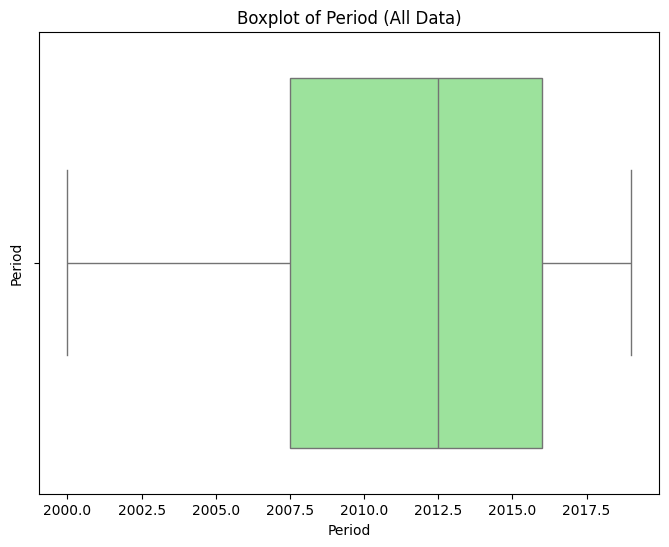

In [38]:
# Step 1: Create a boxplot for the 'Period' column including all data
plt.figure(figsize=(8, 6))
sns.boxplot(data=merged_region_expectancy['Period'], orient='h', color='lightgreen')
plt.title('Boxplot of Period (All Data)')
plt.ylabel('Period')
plt.show()

Duplicates:
            Location  Period                                        Indicator  \
144           Africa    2019  Healthy life expectancy (HALE) at birth (years)   
145           Africa    2019  Healthy life expectancy (HALE) at birth (years)   
146           Africa    2019  Healthy life expectancy (HALE) at birth (years)   
147           Africa    2015  Healthy life expectancy (HALE) at birth (years)   
148           Africa    2015  Healthy life expectancy (HALE) at birth (years)   
..               ...     ...                                              ...   
211  Western Pacific    2010  Healthy life expectancy (HALE) at birth (years)   
212  Western Pacific    2010  Healthy life expectancy (HALE) at birth (years)   
213  Western Pacific    2000  Healthy life expectancy (HALE) at birth (years)   
214  Western Pacific    2000  Healthy life expectancy (HALE) at birth (years)   
215  Western Pacific    2000  Healthy life expectancy (HALE) at birth (years)   

     First Tool

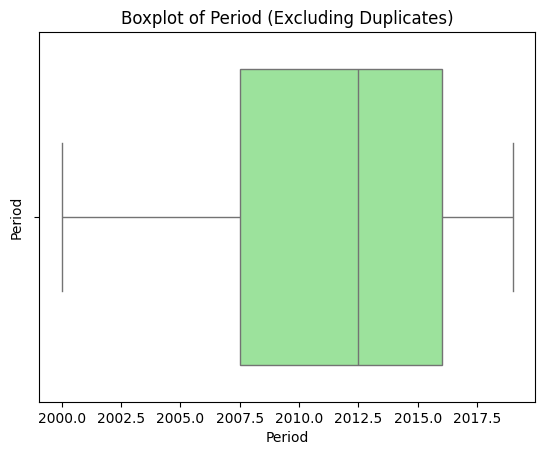

In [39]:
# Step 2: Check for duplicate rows and create a boxplot with filtered data excluding duplicates
duplicates = merged_region_expectancy[merged_region_expectancy.duplicated()]
if not duplicates.empty:
    print("Duplicates:")
    print(duplicates)
    filtered_data = merged_region_expectancy.drop_duplicates()
    sns.boxplot(data=filtered_data['Period'],color='lightgreen', orient='h')
    plt.title('Boxplot of Period (Excluding Duplicates)')
    plt.ylabel('Period')
    plt.show()
else:
    print("No duplicate rows found.")

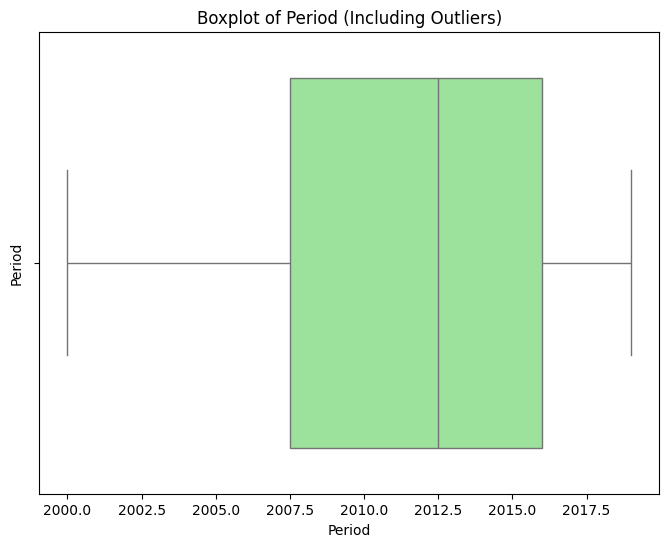

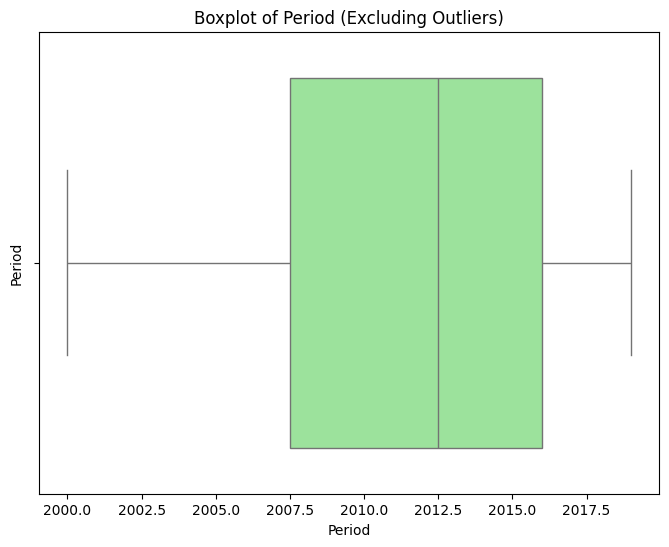

In [40]:
# Step 3: Identify outliers in the 'Period' column
def detect_outliers_iqr(data, threshold=1.5):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (threshold * iqr)
    upper_bound = q3 + (threshold * iqr)
    outliers_indices = data[(data < lower_bound) | (data > upper_bound)].index
    return outliers_indices

outliers_indices = detect_outliers_iqr(merged_region_expectancy['Period'])
# Step 4: Create a boxplot for the 'Period' column including outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=merged_region_expectancy['Period'], color='lightgreen', orient='h')
plt.title('Boxplot of Period (Including Outliers)')
plt.ylabel('Period')
plt.show()

# Step 5: Create a boxplot for the 'Period' column excluding outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=merged_region_expectancy['Period'].drop(outliers_indices), color='lightgreen', orient='h')
plt.title('Boxplot of Period (Excluding Outliers)')
plt.ylabel('Period')
plt.show()

### Merged Health Services

In [41]:
if merged_health_services is not None:
    print("Merged Health Services Data:")
    print(merged_health_services.head())

Merged Health Services Data:
      Location  Period                                          Indicator  \
0  Afghanistan    2017  Population using at least basic drinking-water...   
1  Afghanistan    2016  Population using at least basic drinking-water...   
2  Afghanistan    2015  Population using at least basic drinking-water...   
3  Afghanistan    2014  Population using at least basic drinking-water...   
4  Afghanistan    2013  Population using at least basic drinking-water...   

   First Tooltip Dim1  
0          57.32  NaN  
1          54.84  NaN  
2          52.39  NaN  
3          49.96  NaN  
4          47.56  NaN  


In [42]:
print(merged_health_services.dtypes)

Location          object
Period             int64
Indicator         object
First Tooltip    float64
Dim1              object
dtype: object


In [43]:
#location, indicator, dim1 are categorical variables
merged_health_services.describe()

,Period,First Tooltip
count,20959.000000,20959.000000
mean,2008.994275,68.297133
std,5.129152,31.351259
min,2000.000000,0.000000
25%,2005.000000,41.675000
50%,2009.000000,80.950000
75%,2013.000000,96.800000
max,2019.000000,100.000000


In [44]:
# Print the columns in your DataFrame
print(merged_health_services.columns)

# Check if 'Dim1' exists in the columns
if 'Dim1' in merged_health_services.columns:
    # Drop the 'Dim1' column
    merged_health_services.drop(columns=['Dim1'], inplace=True)
else:
    print("'Dim1' column not found in DataFrame.")

# Print the updated DataFrame
merged_health_services.head()

Index(['Location', 'Period', 'Indicator', 'First Tooltip', 'Dim1'], dtype='object')


,Location,Period,Indicator,First Tooltip
0,Afghanistan,2017,Population using at least basic drinking-water...,57.32
1,Afghanistan,2016,Population using at least basic drinking-water...,54.84
2,Afghanistan,2015,Population using at least basic drinking-water...,52.39
3,Afghanistan,2014,Population using at least basic drinking-water...,49.96
4,Afghanistan,2013,Population using at least basic drinking-water...,47.56


In [45]:
# Check for missing values 
missing_values_merged_health_services = merged_health_services.isnull()

# Print the DataFrame with missing value indicators
print(missing_values_merged_health_services)


       Location  Period  Indicator  First Tooltip
0         False   False      False          False
1         False   False      False          False
2         False   False      False          False
3         False   False      False          False
4         False   False      False          False
...         ...     ...        ...            ...
20954     False   False      False          False
20955     False   False      False          False
20956     False   False      False          False
20957     False   False      False          False
20958     False   False      False          False

[20959 rows x 4 columns]


In [46]:
merged_health_services.head()

,Location,Period,Indicator,First Tooltip
0,Afghanistan,2017,Population using at least basic drinking-water...,57.32
1,Afghanistan,2016,Population using at least basic drinking-water...,54.84
2,Afghanistan,2015,Population using at least basic drinking-water...,52.39
3,Afghanistan,2014,Population using at least basic drinking-water...,49.96
4,Afghanistan,2013,Population using at least basic drinking-water...,47.56


#### Check for Duplicate Rows

In [47]:
duplicate_rows = merged_health_services[merged_health_services.duplicated()]

# Display duplicate rows (if any)
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

Duplicate Rows:
           Location  Period  \
3618        Andorra    2017   
3619        Andorra    2017   
3621        Andorra    2016   
3622        Andorra    2016   
3624        Andorra    2015   
...             ...     ...   
15871     Singapore    2001   
15873     Singapore    2000   
15957         Spain    2014   
18941  Turkmenistan    2017   
18942  Turkmenistan    2017   

                                               Indicator  First Tooltip  
3618   Population using at least basic sanitation ser...         100.00  
3619   Population using at least basic sanitation ser...         100.00  
3621   Population using at least basic sanitation ser...         100.00  
3622   Population using at least basic sanitation ser...         100.00  
3624   Population using at least basic sanitation ser...         100.00  
...                                                  ...            ...  
15871  Population using safely managed sanitation ser...         100.00  
15873  Population u

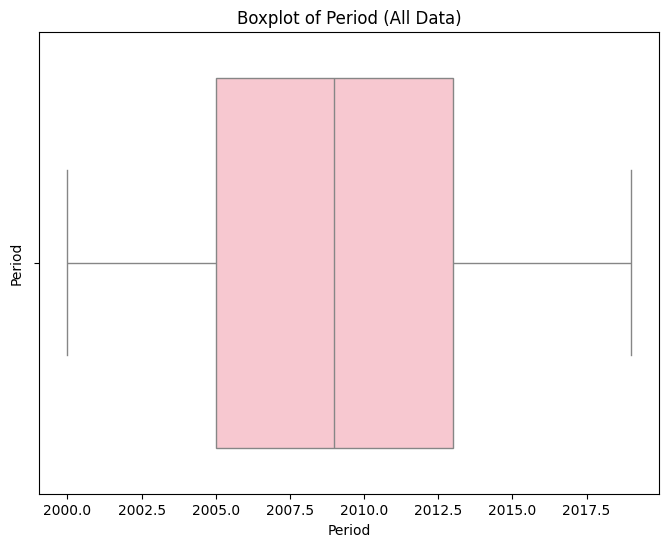

In [48]:
# Step 1: Create a boxplot for the 'Period' column including all data
plt.figure(figsize=(8, 6))
sns.boxplot(data=merged_health_services['Period'], orient='h', color='pink')
plt.title('Boxplot of Period (All Data)')
plt.ylabel('Period')
plt.show()

Duplicates:
           Location  Period  \
3618        Andorra    2017   
3619        Andorra    2017   
3621        Andorra    2016   
3622        Andorra    2016   
3624        Andorra    2015   
...             ...     ...   
15871     Singapore    2001   
15873     Singapore    2000   
15957         Spain    2014   
18941  Turkmenistan    2017   
18942  Turkmenistan    2017   

                                               Indicator  First Tooltip  
3618   Population using at least basic sanitation ser...         100.00  
3619   Population using at least basic sanitation ser...         100.00  
3621   Population using at least basic sanitation ser...         100.00  
3622   Population using at least basic sanitation ser...         100.00  
3624   Population using at least basic sanitation ser...         100.00  
...                                                  ...            ...  
15871  Population using safely managed sanitation ser...         100.00  
15873  Population using

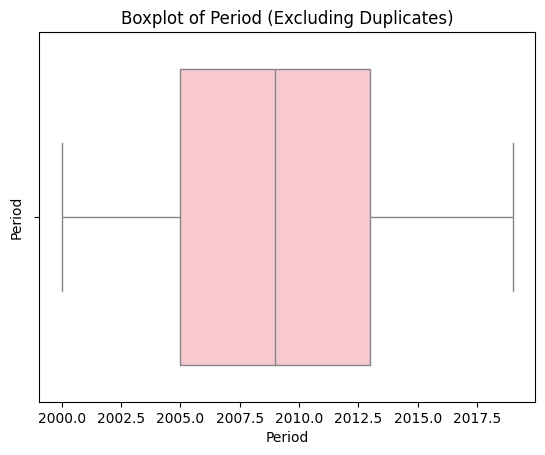

In [49]:
# Step 2: Check for duplicate rows and create a boxplot with filtered data excluding duplicates
duplicates = merged_health_services[merged_health_services.duplicated()]
if not duplicates.empty:
    print("Duplicates:")
    print(duplicates)
    filtered_data = merged_health_services.drop_duplicates()
    sns.boxplot(data=filtered_data['Period'],color='pink', orient='h')
    plt.title('Boxplot of Period (Excluding Duplicates)')
    plt.ylabel('Period')
    plt.show()
else:
    print("No duplicate rows found.")

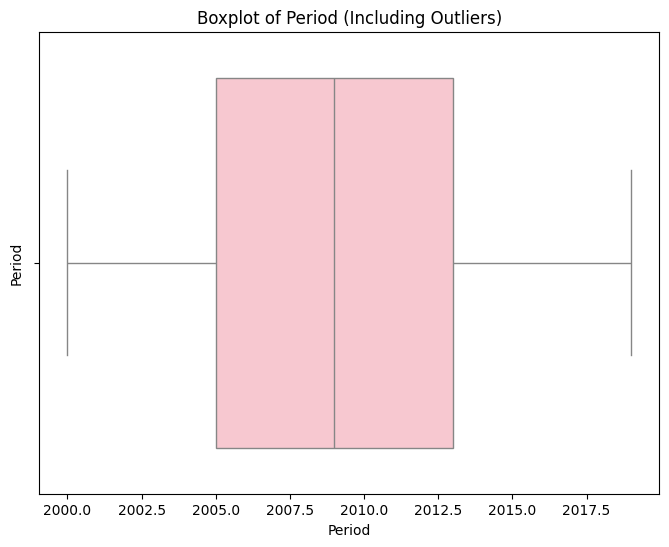

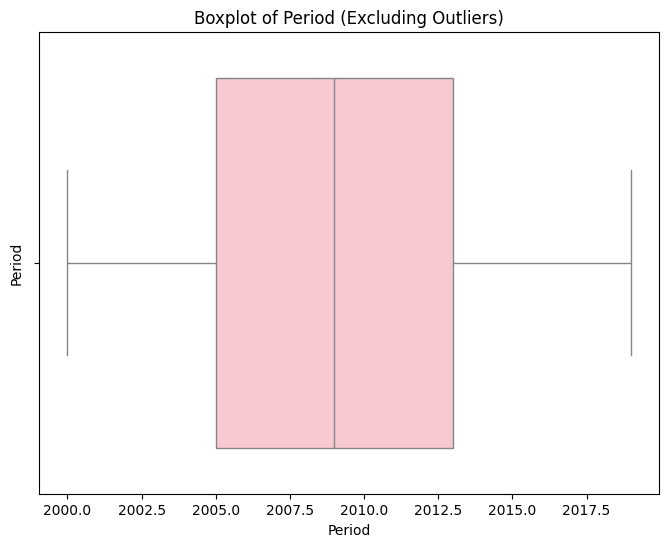

In [50]:
# Step 3: Identify outliers in the 'Period' column
def detect_outliers_iqr(data, threshold=1.5):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (threshold * iqr)
    upper_bound = q3 + (threshold * iqr)
    outliers_indices = data[(data < lower_bound) | (data > upper_bound)].index
    return outliers_indices

outliers_indices = detect_outliers_iqr(merged_health_services['Period'])
# Step 4: Create a boxplot for the 'Period' column including outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=merged_health_services['Period'], color='pink', orient='h')
plt.title('Boxplot of Period (Including Outliers)')
plt.ylabel('Period')
plt.show()

# Step 5: Create a boxplot for the 'Period' column excluding outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=merged_health_services['Period'].drop(outliers_indices), color='pink', orient='h')
plt.title('Boxplot of Period (Excluding Outliers)')
plt.ylabel('Period')
plt.show()

### Merged Disease Incidence

In [51]:
if merged_disease_incidence is not None:
    print("Merged Disease Incidence Data:")
    print(merged_disease_incidence.head())

Merged Disease Incidence Data:
      Location                                          Indicator  Period  \
0  Afghanistan  Reported number of people requiring interventi...    2018   
1  Afghanistan  Reported number of people requiring interventi...    2017   
2  Afghanistan  Reported number of people requiring interventi...    2016   
3  Afghanistan  Reported number of people requiring interventi...    2015   
4  Afghanistan  Reported number of people requiring interventi...    2014   

  First Tooltip Dim1  
0      14834701  NaN  
1      14786722  NaN  
2      13275429  NaN  
3      13765392  NaN  
4      13384908  NaN  


In [52]:
# Function to extract numeric values from strings
def extract_numeric(value):
    if isinstance(value, str):
        numeric_part = re.match(r'(\d+)', value)
        if numeric_part:
            return int(numeric_part.group())
    return None

# Function to extract numeric values from range strings
def extract_numeric_range(value):
    if isinstance(value, str):
        numeric_part = re.match(r'(\d+)\s*\[\d+-\d+\]', value)
        if numeric_part:
            return int(numeric_part.group(1))
    return None

# Function to merge CSV files
def merge_csv_files(files):
    dfs = []
    for file in files:
        filepath = os.path.join(directory, file)
        if os.path.exists(filepath):
            df = pd.read_csv(filepath)
            # Apply extraction logic based on file paths
            if "interventionAgianstNTDs" in file:
                df['First Tooltip'] = df['First Tooltip'].astype(int)  # Direct numeric values
            elif "incedenceOfMalaria" in file or "incedenceOfTuberculosis" in file:
                df['First Tooltip'] = df['First Tooltip'].apply(extract_numeric_range)  # Range format
            else:
                df['First Tooltip'] = df['First Tooltip'].apply(extract_numeric)  # Regular numeric format
            dfs.append(df)
        else:
            print(f"File '{file}' not found.")
    if dfs:
        merged_df = pd.concat(dfs, ignore_index=True)
        return merged_df
    else:
        return None

# Disease incidence files
disease_incidence_files = ["interventionAgianstNTDs.csv", "incedenceOfMalaria.csv",
                           "incedenceOfTuberculosis.csv", "hepatitusBsurfaceAntigen.csv",
                           "newHivInfections.csv"]

# Example usage
merged_disease_incidence = merge_csv_files(disease_incidence_files)



C:\Users\Ahmad1\AppData\Local\Temp\ipykernel_59168\2408750484.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  merged_df = pd.concat(dfs, ignore_index=True)


This code was done because some of the paths consisted of ranges in First Tooltip while others only numbers
So to combine them and convert it into float correctly this was done

In [53]:
# Print the columns in your DataFrame
print(merged_disease_incidence.columns)

# Check if 'Dim1' exists in the columns
if 'Dim1' in merged_disease_incidence.columns:
    # Drop the 'Dim1' column
    merged_disease_incidence.drop(columns=['Dim1'], inplace=True)
else:
    print("'Dim1' column not found in DataFrame.")

# Print the updated DataFrame
merged_disease_incidence.head()

Index(['Location', 'Indicator', 'Period', 'First Tooltip', 'Dim1'], dtype='object')


,Location,Indicator,Period,First Tooltip
0,Afghanistan,Reported number of people requiring interventi...,2018,14834701.0
1,Afghanistan,Reported number of people requiring interventi...,2017,14786722.0
2,Afghanistan,Reported number of people requiring interventi...,2016,13275429.0
3,Afghanistan,Reported number of people requiring interventi...,2015,13765392.0
4,Afghanistan,Reported number of people requiring interventi...,2014,13384908.0


In [54]:
merged_disease_incidence.describe()

,Period,First Tooltip
count,10380.000000,6.708000e+03
mean,2010.349229,2.559728e+06
std,5.829804,2.884712e+07
min,2000.000000,0.000000e+00
25%,2005.000000,1.000000e+00
50%,2011.000000,4.600000e+01
75%,2015.000000,3.270000e+02
max,2019.000000,8.460000e+08


In [55]:
print(merged_disease_incidence.dtypes)

Location          object
Indicator         object
Period             int64
First Tooltip    float64
dtype: object


In [56]:
merged_disease_incidence.head()

,Location,Indicator,Period,First Tooltip
0,Afghanistan,Reported number of people requiring interventi...,2018,14834701.0
1,Afghanistan,Reported number of people requiring interventi...,2017,14786722.0
2,Afghanistan,Reported number of people requiring interventi...,2016,13275429.0
3,Afghanistan,Reported number of people requiring interventi...,2015,13765392.0
4,Afghanistan,Reported number of people requiring interventi...,2014,13384908.0


The weird numbers are due to the large values found in NTDs csv file 

In [57]:
# Check for missing values 
missing_values_merged_disease_incidence = merged_disease_incidence.isnull()

# Print the DataFrame with missing value indicators
print(missing_values_merged_disease_incidence)


       Location  Indicator  Period  First Tooltip
0         False      False   False          False
1         False      False   False          False
2         False      False   False          False
3         False      False   False          False
4         False      False   False          False
...         ...        ...     ...            ...
10375     False      False   False          False
10376     False      False   False          False
10377     False      False   False          False
10378     False      False   False          False
10379     False      False   False          False

[10380 rows x 4 columns]


#### Check for Duplicate Rows

In [58]:
duplicate_rows = merged_disease_incidence[merged_disease_incidence.duplicated()]

# Display duplicate rows (if any)
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

Duplicate Rows:
          Location                                          Indicator  Period  \
7831   Afghanistan  New HIV infections (per 1000 uninfected popula...    2019   
7832   Afghanistan  New HIV infections (per 1000 uninfected popula...    2019   
7834   Afghanistan  New HIV infections (per 1000 uninfected popula...    2015   
7835   Afghanistan  New HIV infections (per 1000 uninfected popula...    2015   
7837   Afghanistan  New HIV infections (per 1000 uninfected popula...    2010   
...            ...                                                ...     ...   
10355       Zambia  New HIV infections (per 1000 uninfected popula...    2015   
10358       Zambia  New HIV infections (per 1000 uninfected popula...    2010   
10366     Zimbabwe  New HIV infections (per 1000 uninfected popula...    2019   
10369     Zimbabwe  New HIV infections (per 1000 uninfected popula...    2015   
10376     Zimbabwe  New HIV infections (per 1000 uninfected popula...    2005   

       Firs

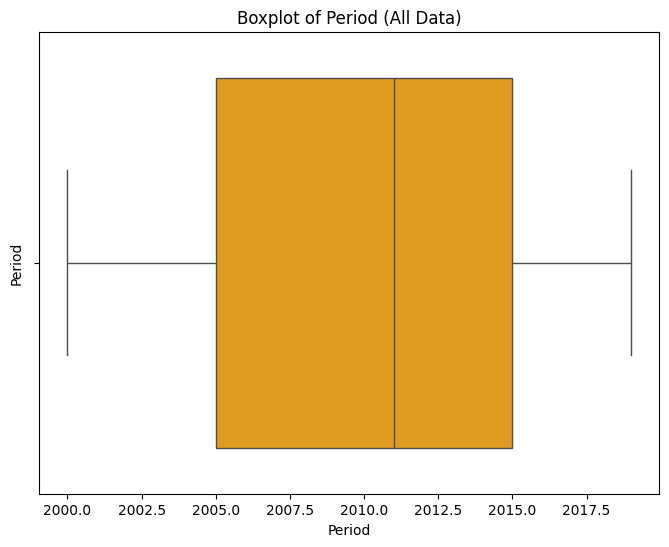

In [59]:
# Step 1: Create a boxplot for the 'Period' column including all data
plt.figure(figsize=(8, 6))
sns.boxplot(data=merged_disease_incidence['Period'], orient='h', color='orange')
plt.title('Boxplot of Period (All Data)')
plt.ylabel('Period')
plt.show()

Duplicates:
          Location                                          Indicator  Period  \
7831   Afghanistan  New HIV infections (per 1000 uninfected popula...    2019   
7832   Afghanistan  New HIV infections (per 1000 uninfected popula...    2019   
7834   Afghanistan  New HIV infections (per 1000 uninfected popula...    2015   
7835   Afghanistan  New HIV infections (per 1000 uninfected popula...    2015   
7837   Afghanistan  New HIV infections (per 1000 uninfected popula...    2010   
...            ...                                                ...     ...   
10355       Zambia  New HIV infections (per 1000 uninfected popula...    2015   
10358       Zambia  New HIV infections (per 1000 uninfected popula...    2010   
10366     Zimbabwe  New HIV infections (per 1000 uninfected popula...    2019   
10369     Zimbabwe  New HIV infections (per 1000 uninfected popula...    2015   
10376     Zimbabwe  New HIV infections (per 1000 uninfected popula...    2005   

       First To

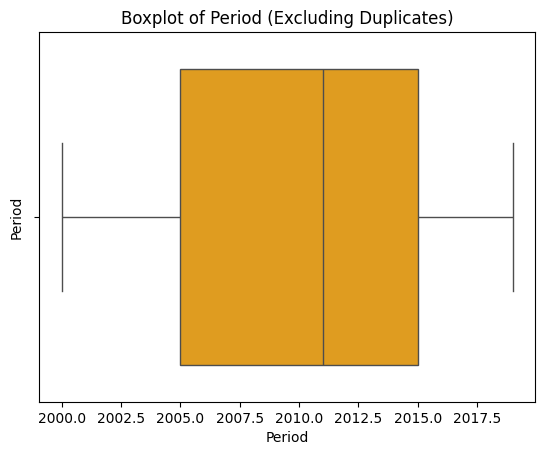

In [60]:
# Step 2: Check for duplicate rows and create a boxplot with filtered data excluding duplicates
duplicates = merged_disease_incidence[merged_disease_incidence.duplicated()]
if not duplicates.empty:
    print("Duplicates:")
    print(duplicates)
    filtered_data = merged_disease_incidence.drop_duplicates()
    sns.boxplot(data=filtered_data['Period'],color='orange', orient='h')
    plt.title('Boxplot of Period (Excluding Duplicates)')
    plt.ylabel('Period')
    plt.show()
else:
    print("No duplicate rows found.")

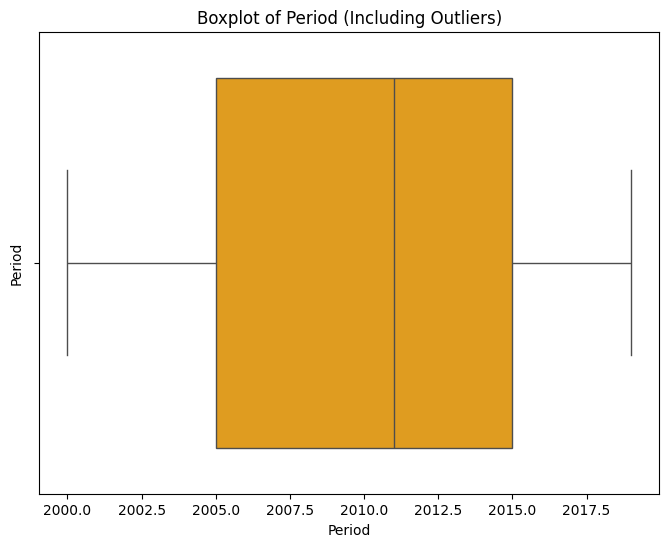

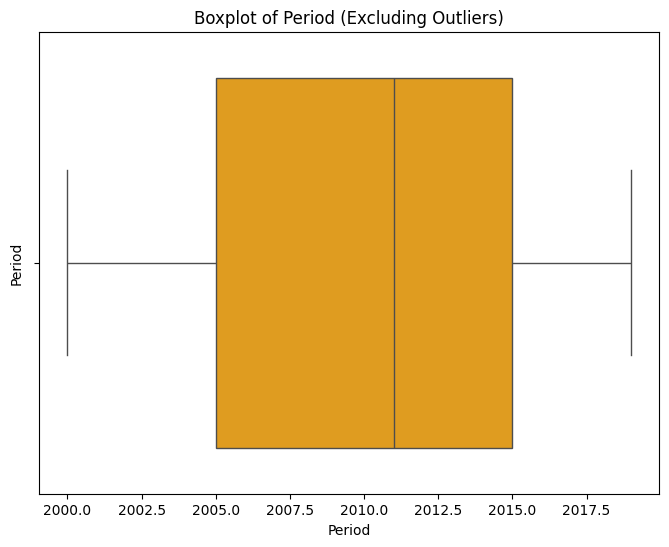

In [61]:
# Step 3: Identify outliers in the 'Period' column
def detect_outliers_iqr(data, threshold=1.5):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (threshold * iqr)
    upper_bound = q3 + (threshold * iqr)
    outliers_indices = data[(data < lower_bound) | (data > upper_bound)].index
    return outliers_indices

outliers_indices = detect_outliers_iqr(merged_disease_incidence['Period'])
# Step 4: Create a boxplot for the 'Period' column including outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=merged_disease_incidence['Period'], color='orange', orient='h')
plt.title('Boxplot of Period (Including Outliers)')
plt.ylabel('Period')
plt.show()

# Step 5: Create a boxplot for the 'Period' column excluding outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=merged_disease_incidence['Period'].drop(outliers_indices), color='orange', orient='h')
plt.title('Boxplot of Period (Excluding Outliers)')
plt.ylabel('Period')
plt.show()

In [62]:
merged_disease_incidence.drop_duplicates(subset=["Location", "Indicator", "Period", "First Tooltip"], inplace=True)

# Print the shape of the DataFrame after removing duplicates
print(merged_disease_incidence.shape)

# Print the first few rows to verify the removal of duplicates
print(merged_disease_incidence.head())


(8876, 4)
      Location                                          Indicator  Period  \
0  Afghanistan  Reported number of people requiring interventi...    2018   
1  Afghanistan  Reported number of people requiring interventi...    2017   
2  Afghanistan  Reported number of people requiring interventi...    2016   
3  Afghanistan  Reported number of people requiring interventi...    2015   
4  Afghanistan  Reported number of people requiring interventi...    2014   

   First Tooltip  
0     14834701.0  
1     14786722.0  
2     13275429.0  
3     13765392.0  
4     13384908.0  


### Maternal Health

In [63]:
if merged_maternal_health is not None:
    print("Merged Maternal Health Data:")
    print(merged_maternal_health.head())

Merged Maternal Health Data:
      Location  Period                                          Indicator  \
0  Afghanistan    2017  Maternal mortality ratio (per 100 000 live bir...   
1  Afghanistan    2016  Maternal mortality ratio (per 100 000 live bir...   
2  Afghanistan    2015  Maternal mortality ratio (per 100 000 live bir...   
3  Afghanistan    2014  Maternal mortality ratio (per 100 000 live bir...   
4  Afghanistan    2013  Maternal mortality ratio (per 100 000 live bir...   

    First Tooltip  
0  638 [427-1010]  
1  673 [457-1040]  
2  701 [501-1020]  
3  786 [592-1080]  
4  810 [617-1080]  


In [64]:
print(merged_maternal_health.columns)

Index(['Location', 'Period', 'Indicator', 'First Tooltip'], dtype='object')


In [65]:
merged_maternal_health.describe()


,Period
count,3294.000000
mean,2008.500000
std,5.188915
min,2000.000000
25%,2004.000000
50%,2008.500000
75%,2013.000000
max,2017.000000


In [66]:
print(merged_maternal_health.dtypes)

Location         object
Period            int64
Indicator        object
First Tooltip    object
dtype: object


In [67]:
# Preprocess 'First Tooltip' column
def extract_numeric(value):
    # Extract numeric part from the string using regex
    numeric_part = re.search(r'\d+', value)
    if numeric_part:
        return float(numeric_part.group())
    else:
        return None

# Apply the extract_numeric function to 'First Tooltip' column
merged_maternal_health['First Tooltip'] = merged_maternal_health['First Tooltip'].apply(extract_numeric)

print(merged_maternal_health.dtypes)
print(merged_maternal_health.head())

Location          object
Period             int64
Indicator         object
First Tooltip    float64
dtype: object
      Location  Period                                          Indicator  \
0  Afghanistan    2017  Maternal mortality ratio (per 100 000 live bir...   
1  Afghanistan    2016  Maternal mortality ratio (per 100 000 live bir...   
2  Afghanistan    2015  Maternal mortality ratio (per 100 000 live bir...   
3  Afghanistan    2014  Maternal mortality ratio (per 100 000 live bir...   
4  Afghanistan    2013  Maternal mortality ratio (per 100 000 live bir...   

   First Tooltip  
0          638.0  
1          673.0  
2          701.0  
3          786.0  
4          810.0  


In [68]:
# Check for missing values 
missing_values_merged_maternal_health= merged_maternal_health.isnull()

# Print the DataFrame with missing value indicators
print(missing_values_merged_maternal_health)


      Location  Period  Indicator  First Tooltip
0        False   False      False          False
1        False   False      False          False
2        False   False      False          False
3        False   False      False          False
4        False   False      False          False
...        ...     ...        ...            ...
3289     False   False      False          False
3290     False   False      False          False
3291     False   False      False          False
3292     False   False      False          False
3293     False   False      False          False

[3294 rows x 4 columns]


#### Check for Duplicate Rows

In [69]:
duplicate_rows = merged_maternal_health[merged_maternal_health.duplicated()]

# Display duplicate rows (if any)
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

No duplicate rows found.


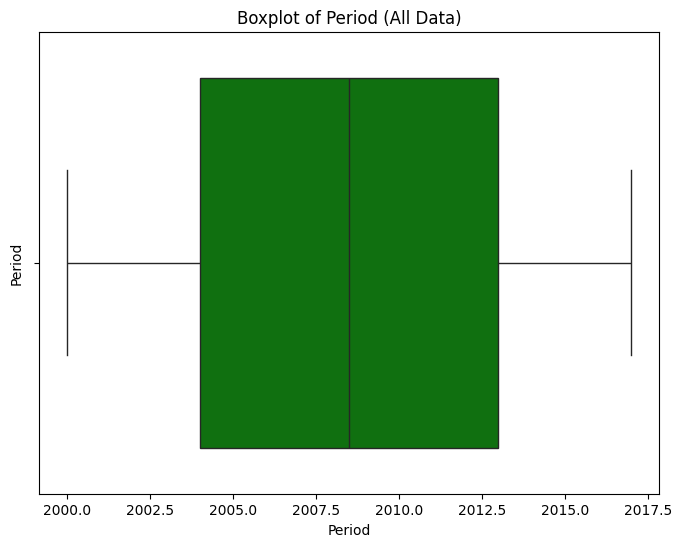

In [70]:
# Step 1: Create a boxplot for the 'Period' column including all data
plt.figure(figsize=(8, 6))
sns.boxplot(data=merged_maternal_health['Period'], orient='h', color='green')
plt.title('Boxplot of Period (All Data)')
plt.ylabel('Period')
plt.show()

In [71]:

# Step 2: Check for duplicate rows and create a boxplot with filtered data excluding duplicates
duplicates = merged_maternal_health[merged_maternal_health.duplicated()]
if not duplicates.empty:
    print("Duplicates:")
    print(duplicates)
    filtered_data = merged_maternal_health.drop_duplicates()
    sns.boxplot(data=filtered_data['Period'],color='green', orient='h')
    plt.title('Boxplot of Period (Excluding Duplicates)')
    plt.ylabel('Period')
    plt.show()
else:
    print("No duplicate rows found.")

No duplicate rows found.


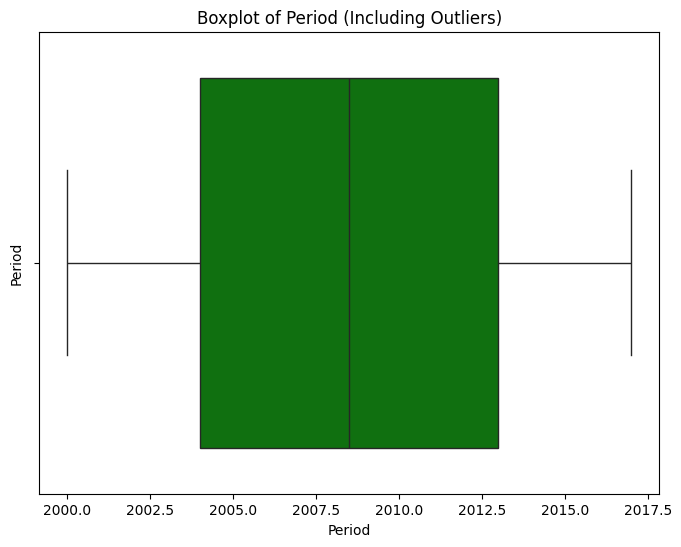

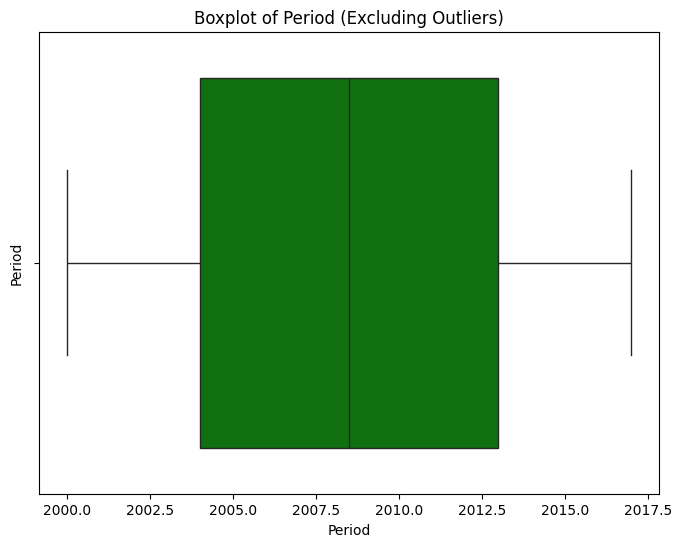

In [72]:
# Step 3: Identify outliers in the 'Period' column
def detect_outliers_iqr(data, threshold=1.5):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (threshold * iqr)
    upper_bound = q3 + (threshold * iqr)
    outliers_indices = data[(data < lower_bound) | (data > upper_bound)].index
    return outliers_indices

outliers_indices = detect_outliers_iqr(merged_maternal_health['Period'])
# Step 4: Create a boxplot for the 'Period' column including outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=merged_maternal_health['Period'], color='green', orient='h')
plt.title('Boxplot of Period (Including Outliers)')
plt.ylabel('Period')
plt.show()

# Step 5: Create a boxplot for the 'Period' column excluding outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=merged_maternal_health['Period'].drop(outliers_indices), color='green', orient='h')
plt.title('Boxplot of Period (Excluding Outliers)')
plt.ylabel('Period')
plt.show()

### Encoding 


#### Indicator

In [73]:
# Initialize LabelEncoders for each DataFrame
label_encoder_health = LabelEncoder()
label_encoder_region = LabelEncoder()
label_encoder_life = LabelEncoder()
label_encoder_disease = LabelEncoder()
label_encoder_maternal = LabelEncoder()
label_encoder_mortality = LabelEncoder()

# Apply label encoding to 'Indicator' column in each DataFrame
merged_health_services['Indicator_encoded'] = label_encoder_health.fit_transform(merged_health_services['Indicator'])
merged_region_expectancy['Indicator_encoded'] = label_encoder_region.fit_transform(merged_region_expectancy['Indicator'])
merged_life_expectancy['Indicator_encoded'] = label_encoder_life.fit_transform(merged_life_expectancy['Indicator'])
merged_disease_incidence['Indicator_encoded'] = label_encoder_disease.fit_transform(merged_disease_incidence['Indicator'])
merged_maternal_health['Indicator_encoded'] = label_encoder_maternal.fit_transform(merged_maternal_health['Indicator'])
merged_mortality['Indicator_encoded'] = label_encoder_mortality.fit_transform(merged_mortality['Indicator'])

# Print unique indicators and encoded values for verification
print("Unique Indicators and Encoded Values in merged_health_services:")
print(merged_health_services[['Indicator', 'Indicator_encoded']].drop_duplicates())

print("\nUnique Indicators and Encoded Values in merged_region_expectancy:")
print(merged_region_expectancy[['Indicator', 'Indicator_encoded']].drop_duplicates())

print("\nUnique Indicators and Encoded Values in merged_mortality:")
print(merged_mortality[['Indicator', 'Indicator_encoded']].drop_duplicates())

# Repeat for other DataFrames


Unique Indicators and Encoded Values in merged_health_services:
                                               Indicator  Indicator_encoded
0      Population using at least basic drinking-water...                  1
3455   Population using at least basic sanitation ser...                  2
12823  Population using safely managed sanitation ser...                  3
16478  Population with basic handwashing facilities a...                  4
19204    Births attended by skilled health personnel (%)                  0

Unique Indicators and Encoded Values in merged_region_expectancy:
                                          Indicator  Indicator_encoded
0                  Life expectancy at birth (years)                  1
72  Healthy life expectancy (HALE) at birth (years)                  0

Unique Indicators and Encoded Values in merged_mortality:
                                               Indicator  Indicator_encoded
0      Infant mortality rate (probability of dying be...         

#### Location

In [74]:
# Initialize LabelEncoders for each DataFrame
label_encoder_location_health = LabelEncoder()
label_encoder_location_region = LabelEncoder()
label_encoder_location_life = LabelEncoder()
label_encoder_location_disease = LabelEncoder()
label_encoder_location_maternal = LabelEncoder()
label_encoder_location_mortality = LabelEncoder()

# Apply label encoding to 'Location' column in each DataFrame
merged_health_services['Location_encoded'] = label_encoder_location_health.fit_transform(merged_health_services['Location'])
merged_region_expectancy['Location_encoded'] = label_encoder_location_region.fit_transform(merged_region_expectancy['Location'])
merged_life_expectancy['Location_encoded'] = label_encoder_location_life.fit_transform(merged_life_expectancy['Location'])
merged_disease_incidence['Location_encoded'] = label_encoder_location_disease.fit_transform(merged_disease_incidence['Location'])
merged_maternal_health['Location_encoded'] = label_encoder_location_maternal.fit_transform(merged_maternal_health['Location'])
merged_mortality['Location_encoded'] = label_encoder_location_mortality.fit_transform(merged_mortality['Location'])

# Print encoded values for verification (example for merged_health_services)
print(merged_health_services[['Location', 'Location_encoded']].head())
print(merged_health_services[['Location', 'Location_encoded']].tail())


      Location  Location_encoded
0  Afghanistan                 0
1  Afghanistan                 0
2  Afghanistan                 0
3  Afghanistan                 0
4  Afghanistan                 0
       Location  Location_encoded
20954  Zimbabwe               195
20955  Zimbabwe               195
20956  Zimbabwe               195
20957  Zimbabwe               195
20958  Zimbabwe               195


## Data Visualization

C:\Users\Ahmad1\AppData\Local\Temp\ipykernel_59168\3676497649.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_health_services, x='Indicator_encoded', palette='viridis')


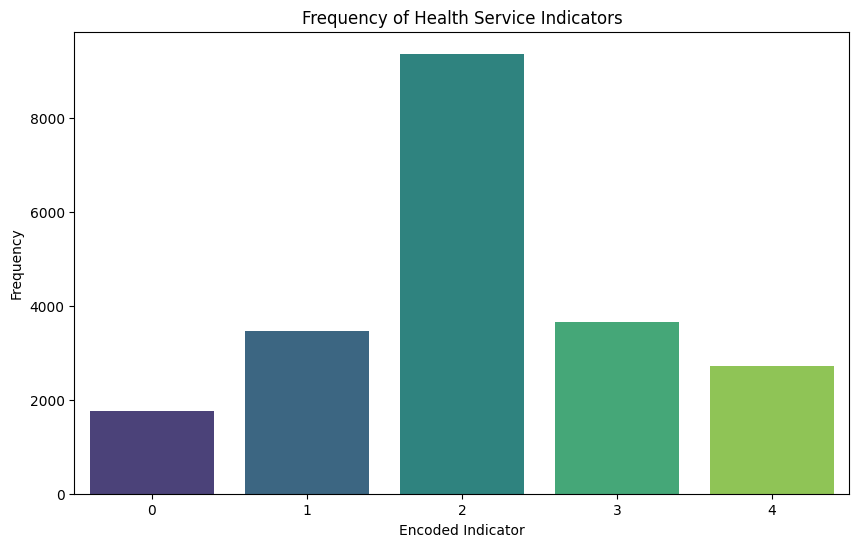

In [75]:
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_health_services, x='Indicator_encoded', palette='viridis')
plt.xlabel('Encoded Indicator')
plt.ylabel('Frequency')
plt.title('Frequency of Health Service Indicators')
plt.show()

C:\Users\Ahmad1\AppData\Local\Temp\ipykernel_59168\1596156967.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=merged_health_services, x='Period', y='Indicator_encoded', palette='Set3')


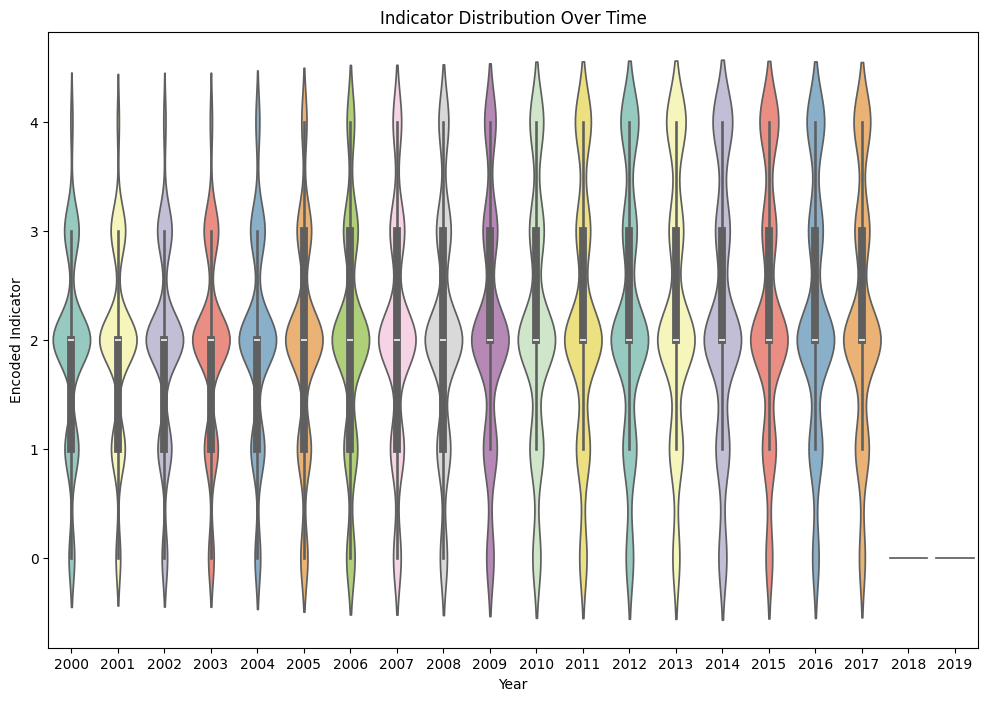

In [76]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=merged_health_services, x='Period', y='Indicator_encoded', palette='Set3')
plt.xlabel('Year')
plt.ylabel('Encoded Indicator')
plt.title('Indicator Distribution Over Time')
plt.show()


C:\Users\Ahmad1\AppData\Local\Temp\ipykernel_59168\1030691191.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_mortality, x='Period', y='First Tooltip', palette='viridis')


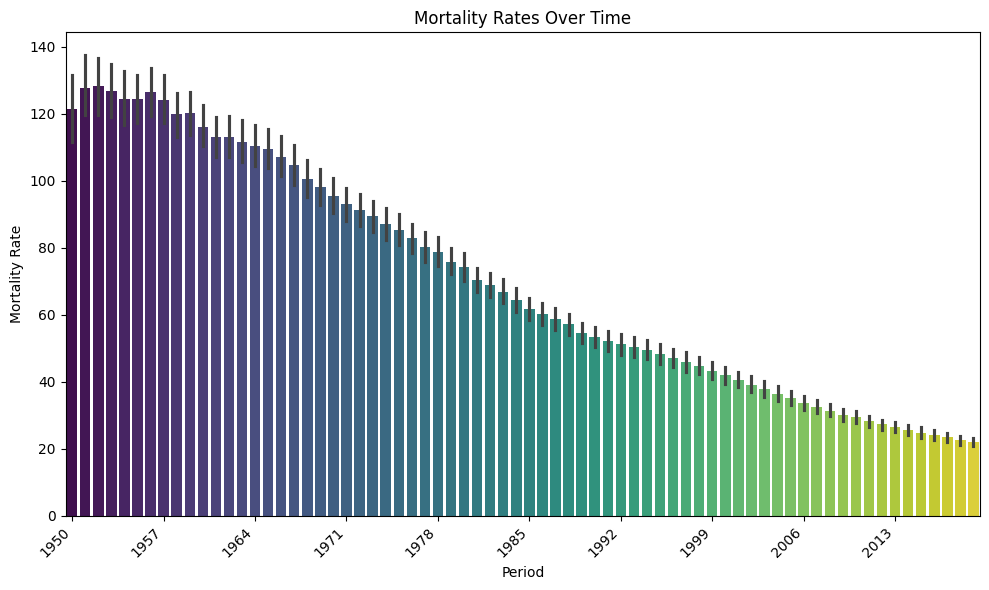

In [77]:
# Calculate the number of periods and set the tick frequency
num_periods = merged_mortality['Period'].nunique()
tick_frequency = max(1, num_periods // 10)  # Adjust tick frequency as needed

plt.figure(figsize=(10, 6))
sns.barplot(data=merged_mortality, x='Period', y='First Tooltip', palette='viridis')
plt.xlabel('Period')
plt.ylabel('Mortality Rate')
plt.title('Mortality Rates Over Time')
plt.xticks(np.arange(0, num_periods, tick_frequency), rotation=45, ha='right')  # Specify tick locations and adjust rotation
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


C:\Users\Ahmad1\AppData\Local\Temp\ipykernel_59168\504656264.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=merged_mortality, x='Period', y='First Tooltip', estimator='mean', ci='sd', color='skyblue')


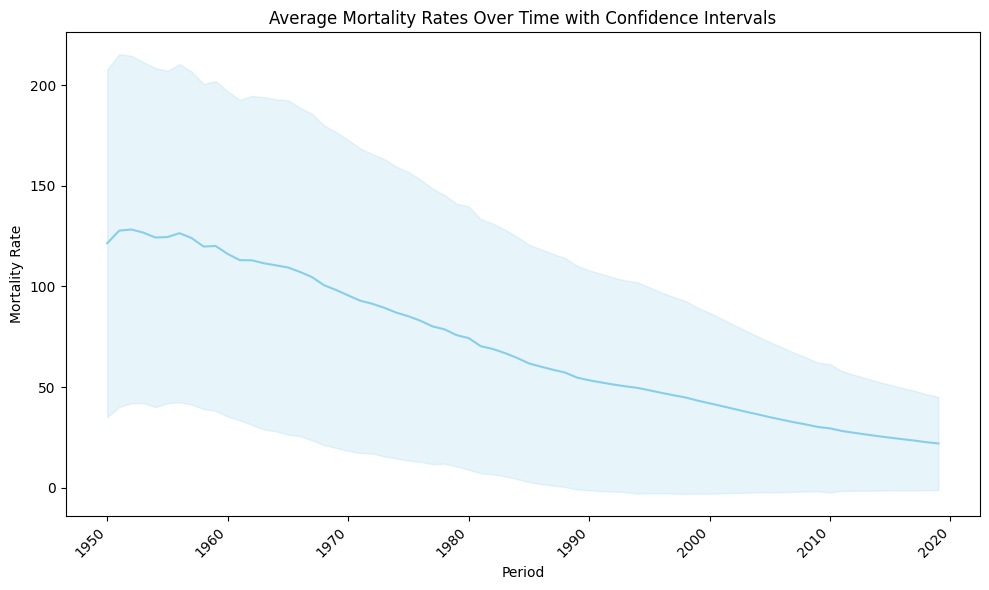

In [78]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=merged_mortality, x='Period', y='First Tooltip', estimator='mean', ci='sd', color='skyblue')
plt.xlabel('Period')
plt.ylabel('Mortality Rate')
plt.title('Average Mortality Rates Over Time with Confidence Intervals')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


C:\Users\Ahmad1\AppData\Local\Temp\ipykernel_59168\3203347312.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_mortality, x='Decade', y='First Tooltip', palette='viridis')


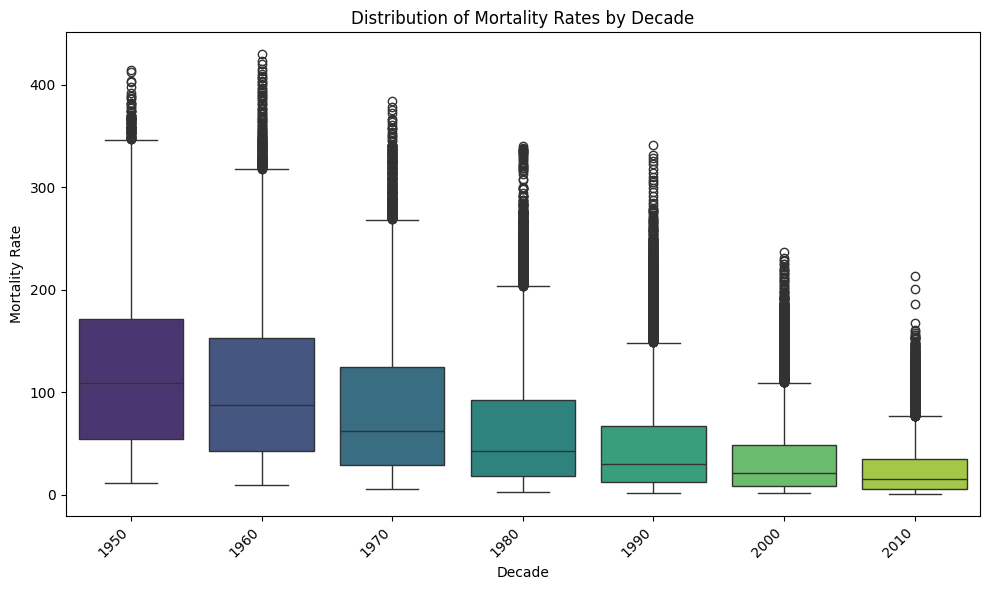

In [79]:
# Extract decade from period
merged_mortality['Decade'] = (merged_mortality['Period'] // 10) * 10

plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_mortality, x='Decade', y='First Tooltip', palette='viridis')
plt.xlabel('Decade')
plt.ylabel('Mortality Rate')
plt.title('Distribution of Mortality Rates by Decade')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


C:\Users\Ahmad1\AppData\Local\Temp\ipykernel_59168\75856884.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=variance_values.index, y=variance_values.values, palette='coolwarm')


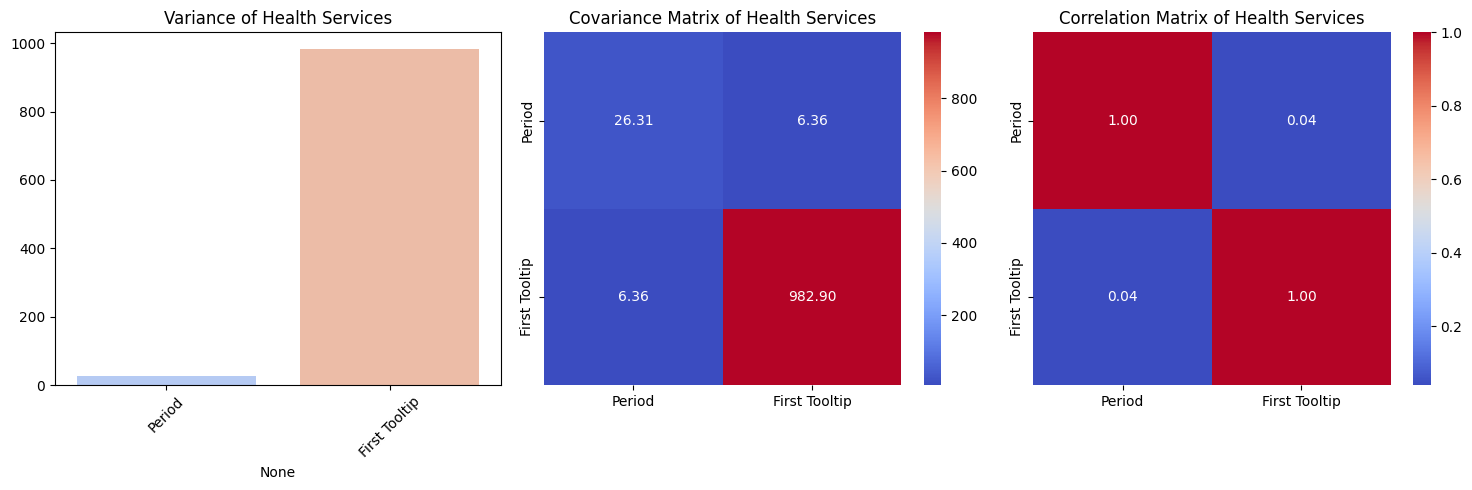

C:\Users\Ahmad1\AppData\Local\Temp\ipykernel_59168\75856884.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=variance_values.index, y=variance_values.values, palette='coolwarm')


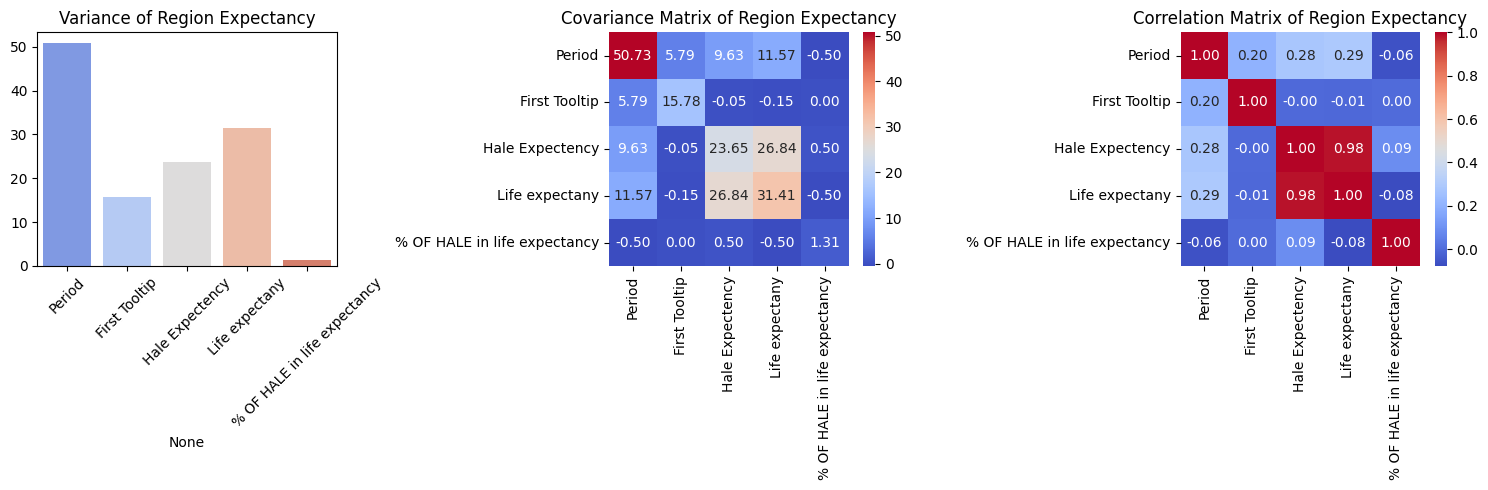

C:\Users\Ahmad1\AppData\Local\Temp\ipykernel_59168\75856884.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=variance_values.index, y=variance_values.values, palette='coolwarm')


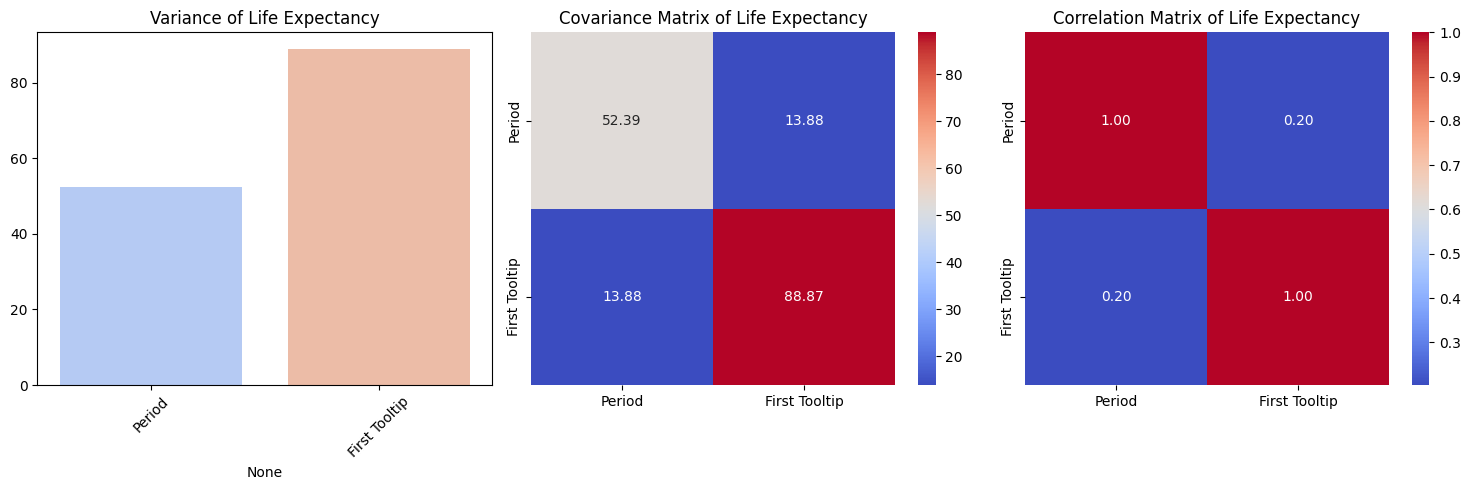

C:\Users\Ahmad1\AppData\Local\Temp\ipykernel_59168\75856884.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=variance_values.index, y=variance_values.values, palette='coolwarm')


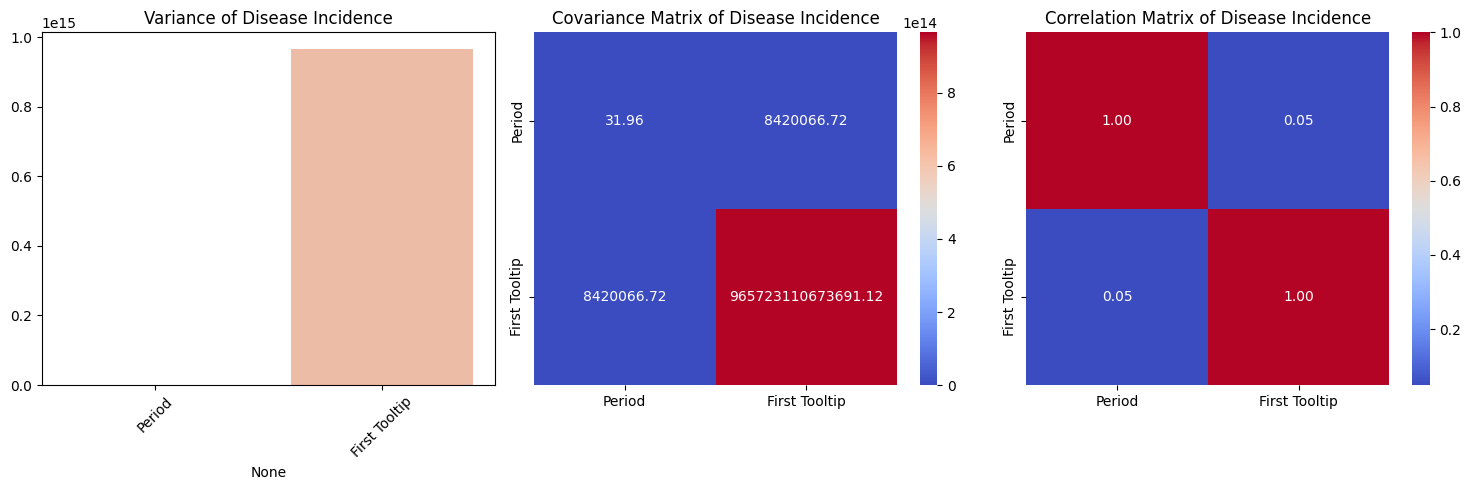

C:\Users\Ahmad1\AppData\Local\Temp\ipykernel_59168\75856884.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=variance_values.index, y=variance_values.values, palette='coolwarm')


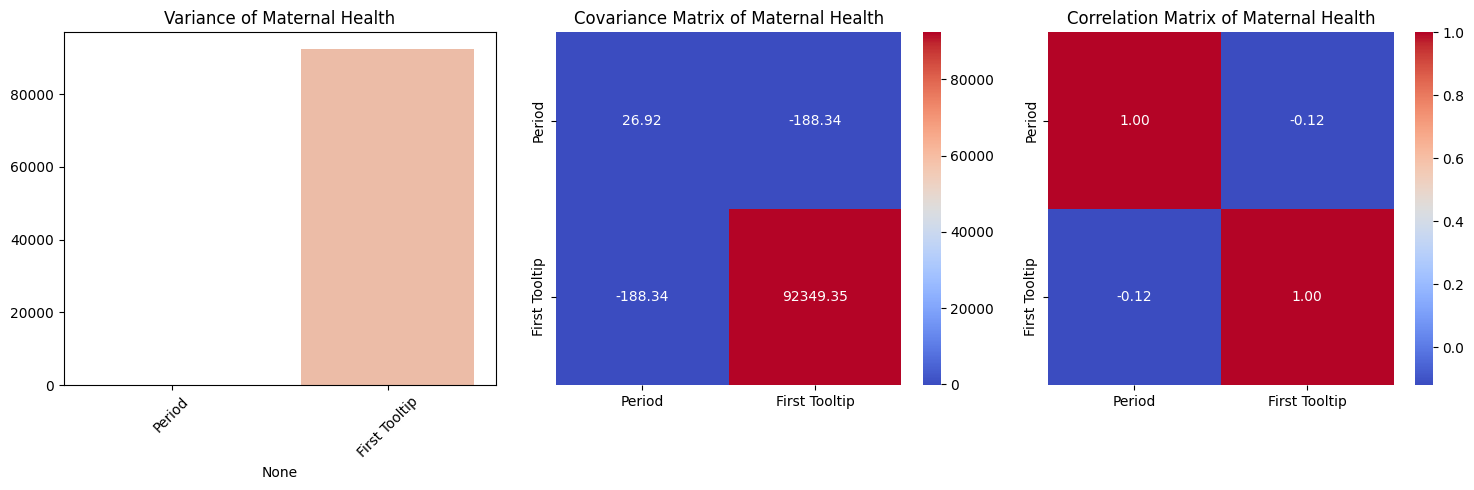

C:\Users\Ahmad1\AppData\Local\Temp\ipykernel_59168\75856884.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=variance_values.index, y=variance_values.values, palette='coolwarm')


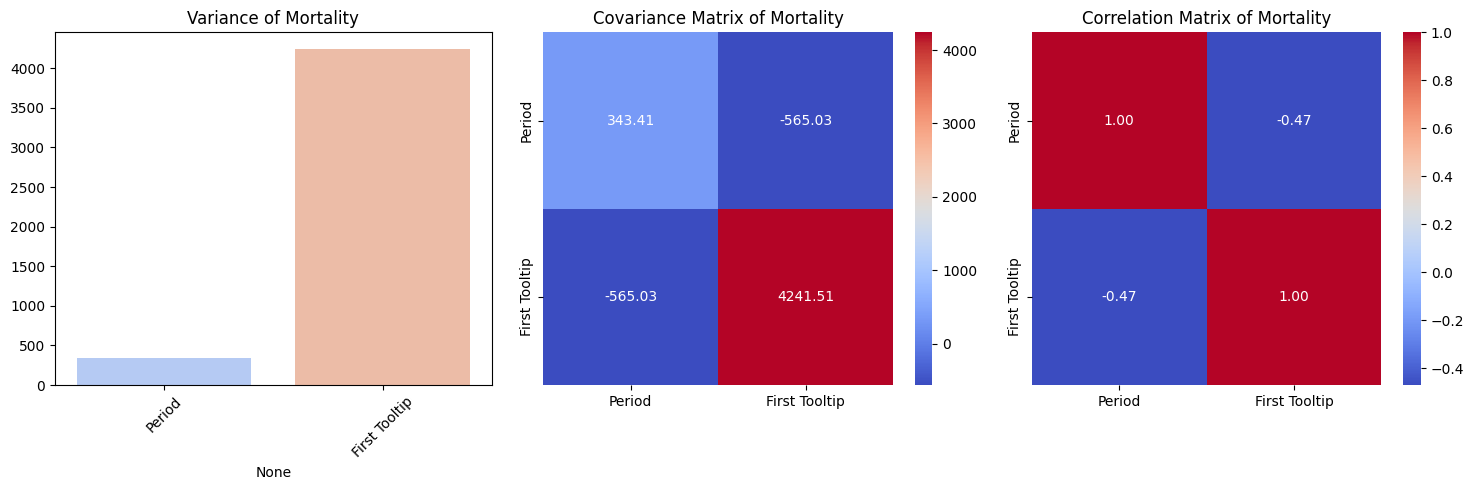

In [80]:
# List of merged datasets with their names and respective DataFrames
merged_datasets = [
    ('Health Services', merged_health_services),
    ('Region Expectancy', merged_region_expectancy),
    ('Life Expectancy', merged_life_expectancy),
    ('Disease Incidence', merged_disease_incidence),
    ('Maternal Health', merged_maternal_health),
    ('Mortality', merged_mortality)
]

# Calculate and plot variance, covariance, and correlation values for each dataset
for dataset_name, merged_df in merged_datasets:
    # Exclude columns
    columns_to_exclude = ['Decade', 'Indicator_encoded', 'Location_encoded']
    numeric_columns = merged_df.select_dtypes(include=np.number).drop(columns=columns_to_exclude, errors='ignore')
    
    # Calculate variance, covariance, and correlation
    variance_values = numeric_columns.var()
    covariance_matrix = numeric_columns.cov()
    correlation_matrix = numeric_columns.corr()
    
    # Plotting
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    sns.barplot(x=variance_values.index, y=variance_values.values, palette='coolwarm')
    plt.title(f'Variance of {dataset_name}')
    plt.xticks(rotation=45)
    plt.subplot(1, 3, 2)
    sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Covariance Matrix of {dataset_name}')
    plt.subplot(1, 3, 3)
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Matrix of {dataset_name}')
    plt.tight_layout()
    plt.show()


### Split merged_mortality

In [81]:
# Define features (X) and target (y)
X_cols_mortality = ['Location_encoded', 'Period', 'Indicator_encoded']
y_col_mortality = 'First Tooltip'

X_mortality = merged_health_services[X_cols_mortality]  # Use the appropriate DataFrame here
y_mortality = merged_health_services[y_col_mortality]  # Use the appropriate DataFrame here

# Split data into training and test sets
X_train_mortality, X_test_mortality, y_train_mortality, y_test_mortality = train_test_split(X_mortality, y_mortality, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled_mortality = scaler.fit_transform(X_train_mortality)
X_test_scaled_mortality = scaler.transform(X_test_mortality)

# Now can use X_train_scaled_mortality, X_test_scaled_mortality, y_train_mortality, y_test_mortality 
# For example:
# 1. Train model using X_train_scaled_mortality, y_train_mortality
# 2. Evaluate model using X_test_scaled_mortality, y_test_mortality


### Split merged_life_expectancy

In [82]:
# Define features (X) and target (y)
X_cols_life = ['Location_encoded', 'Period', 'Indicator_encoded']
y_col_life = 'First Tooltip'

X_life = merged_life_expectancy[X_cols_life]
y_life = merged_life_expectancy[y_col_life]

# Split data into training and test sets
X_train_life, X_test_life, y_train_life, y_test_life = train_test_split(X_life, y_life, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled_life = scaler.fit_transform(X_train_life)
X_test_scaled_life = scaler.transform(X_test_life)

# Now can use X_train_scaled_life, X_test_scaled_life, y_train_life, y_test_life 
# For example:
# 1. Train model using X_train_scaled_life, y_train_life
# 2. Evaluate model using X_test_scaled_life, y_test_life


### Split merged_region_expectancy

In [83]:
# Define features (X) and target (y)
X_cols_region = ['Location_encoded', 'Period', 'Indicator_encoded', 'Hale Expectency', 'Life expectany', '% OF HALE in life expectancy']
y_col_region = 'First Tooltip'

X_region = merged_region_expectancy[X_cols_region]
y_region = merged_region_expectancy[y_col_region]

# Split data into training and test sets
X_train_region, X_test_region, y_train_region, y_test_region = train_test_split(X_region, y_region, test_size=0.2, random_state=42)

# Scale numerical features
scaler_region = StandardScaler()
X_train_scaled_region = scaler_region.fit_transform(X_train_region)
X_test_scaled_region = scaler_region.transform(X_test_region)

# Now can use X_train_scaled_region, X_test_scaled_region, y_train_region, y_test_region 
# For example:
# 1. Train model using X_train_scaled_region, y_train_region
# 2. Evaluate model using X_test_scaled_region, y_test_region

### Split merged_health_services

In [84]:
# Define features (X) and target (y)
X_cols_health = ['Location_encoded', 'Period', 'Indicator_encoded']
y_col_health = 'First Tooltip'

X_health = merged_health_services[X_cols_health]
y_health = merged_health_services[y_col_health]

# Split data into training and test sets
X_train_health, X_test_health, y_train_health, y_test_health = train_test_split(X_health, y_health, test_size=0.2, random_state=42)

# Scale numerical features
scaler_health = StandardScaler()
X_train_scaled_health = scaler_health.fit_transform(X_train_health)
X_test_scaled_health = scaler_health.transform(X_test_health)

# Now can use X_train_scaled_health, X_test_scaled_health, y_train_health, y_test_health
# For example:
# 1. Train model using X_train_scaled_health, y_train_health
# 2. Evaluate model using X_test_scaled_health, y_test_health


### Split merged_disease_incidence

In [85]:
# Define features (X) and target (y)
X_cols_disease = ['Location_encoded', 'Indicator_encoded', 'Period']
y_col_disease = 'First Tooltip'

X_disease = merged_disease_incidence[X_cols_disease]
y_disease = merged_disease_incidence[y_col_disease]

# Split data into training and test sets
X_train_disease, X_test_disease, y_train_disease, y_test_disease = train_test_split(X_disease, y_disease, test_size=0.2, random_state=42)

# Scale numerical features
scaler_disease = StandardScaler()
X_train_scaled_disease = scaler_disease.fit_transform(X_train_disease)
X_test_scaled_disease = scaler_disease.transform(X_test_disease)

# Now can use X_train_scaled_disease, X_test_scaled_disease, y_train_disease, y_test_disease 
# For example:
# 1. Train model using X_train_scaled_disease, y_train_disease
# 2. Evaluate model using X_test_scaled_disease, y_test_disease


### Split merged_maternal_health

In [86]:
# Define features (X) and target (y) for merged_maternal_health
X_cols_maternal = ['Location_encoded', 'Period', 'Indicator_encoded']
y_col_maternal = 'First Tooltip'

X_maternal = merged_maternal_health[X_cols_maternal]
y_maternal = merged_maternal_health[y_col_maternal]

# Split data into training and test sets
X_train_maternal, X_test_maternal, y_train_maternal, y_test_maternal = train_test_split(X_maternal, y_maternal, test_size=0.2, random_state=42)

# Scale numerical features
scaler_maternal = StandardScaler()
X_train_scaled_maternal = scaler_maternal.fit_transform(X_train_maternal)
X_test_scaled_maternal = scaler_maternal.transform(X_test_maternal)

# Now can use X_train_scaled_maternal, X_test_scaled_maternal, y_train_maternal, y_test_maternal 
# For example:
# 1. Train model using X_train_scaled_maternal, y_train_maternal
# 2. Evaluate model using X_test_scaled_maternal, y_test_maternal
